# Clustering and PCA Assignment

### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

### Goals
    1. Categorise the countries using some socio-economic and health factors that determine the overall development of the country.

    2. Suggest the countries which the CEO needs to focus on the most.

## Read and understand Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set Pandas options for better display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)

In [4]:
# Data Dictionary
data_dict = pd.read_csv('data-dictionary.csv')

# Countries Socio-Economic and Health Related data
countries = pd.read_csv('Country-data.csv')

In [5]:
data_dict.style.set_properties(**{'text-align': 'left'})

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [6]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
# Use describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
countries.describe(percentiles=[0.025,0.25,0.75,0.8, 0.9, 0.95,0.975])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
2.5%,3.030000,9.643000,2.516500,16.180000,892.500000,-0.960750,53.280000,1.317500,401.100000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
80%,66.320000,54.940000,9.118000,61.680000,29420.000000,12.500000,78.200000,4.592000,21020.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000


Outliers are present in all the columns. Outlier treatment will be done post creation of Principal COmponents.

In [8]:
# Check if there are any null columns using the info() command. 
# Also, understand the number of rows and column using 'shape' attribute.
countries.info()
display(countries.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


(167, 10)

In [9]:
# Check missing values
round(100*(countries.isnull().sum()/len(countries.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [10]:
sum(countries.duplicated())

0

There are no duplicate records. Also, there are no null-values in any of the columns. The dataframe is clean and needs no further processing.

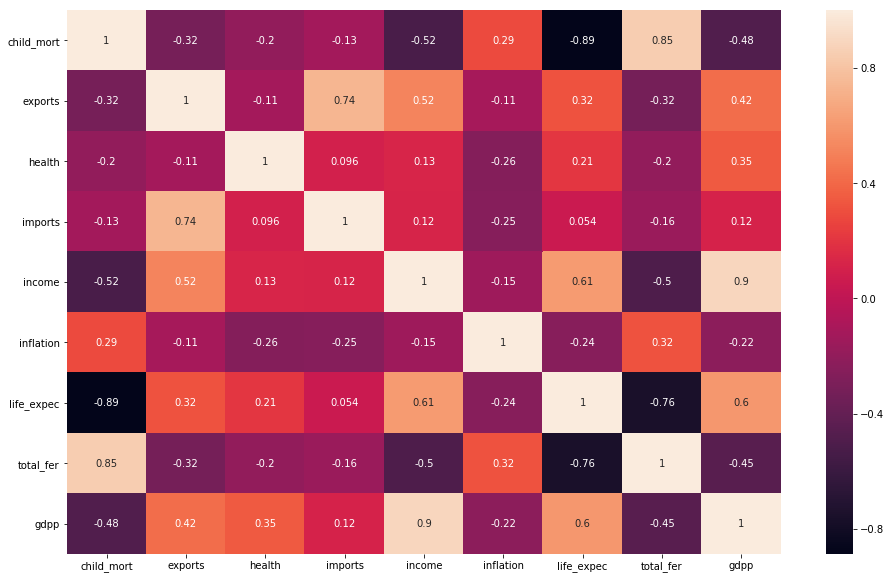

In [11]:
# Plot a "HeatMap" of the pair-wise correlations between various features.
#HeatMap
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(countries.corr(),annot = True)#,cmap='Blues')
plt.yticks(rotation = 0)
plt.show()

There are strong correlations between various features of the dataset. To list a few :
    1. 'child_mort' is highly negatively correlated with 'life_expec' and highly positively correlated with ;total_fer'.
    2. 'gdpp' is highly positively correlated with 'income.
    
**Principal Component Analysis** would be done on all these **"Features"** to generate highly linearly un-correlated **"Principal Components"** which will be later used for the purpose of Clustering.

### Conversion of features - some more write up

The attribute 'gdpp' is defined as the Total GDP per capita i.e., (Total GDP) / Population.

However, the other attributes 'health' , 'export' and 'import' are expressed as percentage of (Total GDP). Since, we do not have the absolute umbers of (Total GDP) or (Population), we will have to convert the attributes 'health' , 'export' and 'import' to represent per person.

This can be achieved by multiplying the attribute with 'gdpp' and dividing by 100.

For example: health_expense_per_peson = (health_expense_percentage_Total_GDP) * (GDP per Capita) / 100.

i.e., healthp = (health * gdpp) / 100

In [12]:
# convert health, import and export
countries['health'] = round((countries.health * countries.gdpp) /100).astype('int')
countries['exports'] = round((countries.exports * countries.gdpp) /100).astype('int')
countries['imports'] = round((countries.imports * countries.gdpp) /100).astype('int')
countries.rename(columns={'health':'healthp','exports':'exportsp','imports':'importsp'},inplace=True)

In [13]:
countries.head(10)

,country,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55,42,248,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145,268,1988,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1713,186,1400,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199,101,1514,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551,736,7186,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1947,834,1648,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,670,142,1459,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276,4531,10847,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24060,5159,22418,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171,343,1209,16000,13.800,69.1,1.92,5840


In [14]:
# Create a list of Numeric Columns that can be used later for various activities like Standardization , Outlier Treatment, etc.
num_vars = list(countries.select_dtypes(exclude='object').columns)

### Standardize Data

In [15]:
#Standardize the data using preprocessing.StandardScaler(). 
from sklearn import preprocessing
countries_std = countries.copy(deep=True)
scaler = preprocessing.StandardScaler()
countries_std[num_vars] = scaler.fit_transform(countries[num_vars])

# Check first few rows to confirm outlier seperation and standardization
display(countries_std.head(10))

,country,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-0.411028,-0.565005,-0.432299,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.350202,-0.439171,-0.313663,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.318506,-0.484828,-0.353754,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,-0.291385,-0.532155,-0.345981,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,-0.104332,-0.178593,0.040745,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,Argentina,-0.591177,-0.305448,-0.124028,-0.336845,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,-0.501643,-0.376709,-0.509326,-0.349731,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,Australia,-0.832423,0.159340,1.934426,0.290358,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,-0.844858,0.928536,2.284090,1.079288,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,Azerbaijan,0.023128,-0.237144,-0.397411,-0.366776,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


### PCA
    1. Perform PCA on all the numeric features of the data(including Outlier Data).
    2. Using Screeplot , determine the optimum number of **Principal Components** to be used.
    3. Build PCA model using the number of components as derived in the previous step and transform the data.

In [16]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# Using fit_transform(), create an array of principal components using the inlier data
countries_pca = pca.fit_transform(countries_std[num_vars])

In [17]:
pca.components_

array([[-0.316393  ,  0.34288603,  0.35853277,  0.34486373,  0.38004139,
        -0.14308666,  0.34385764, -0.30284362,  0.3999879 ],
       [ 0.47626615,  0.39731451,  0.15504027,  0.37078481,  0.12838921,
         0.22125926, -0.36981815,  0.45971356,  0.2006275 ],
       [-0.15001409, -0.03056715, -0.07571556, -0.07217065,  0.14576554,
         0.94841742,  0.19675222, -0.07783613,  0.01033832],
       [-0.14805614,  0.44941926, -0.59973032,  0.46179103, -0.15480011,
        -0.0076453 , -0.01839243, -0.21392414, -0.36476151],
       [ 0.10198742, -0.03854694, -0.49319018, -0.25280144,  0.79407489,
        -0.136431  , -0.1540415 , -0.0203299 ,  0.08750512],
       [ 0.19658742, -0.03890527,  0.18069381, -0.01217555, -0.03814247,
         0.10840456, -0.5860092 , -0.75390267,  0.04537463],
       [ 0.76126687, -0.01367103, -0.06461566,  0.02718345, -0.02310106,
        -0.02207862,  0.58120925, -0.27314346, -0.04403491],
       [ 0.00643178, -0.05522604,  0.43006957,  0.13111805,  0

In [18]:
# Convert the array into a dataframe
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8]},\
                      index=num_vars)

pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
child_mort,-0.316393,0.476266,-0.150014,-0.148056,0.101987,0.196587,0.761267,0.006432,-0.004952
exportsp,0.342886,0.397315,-0.030567,0.449419,-0.038547,-0.038905,-0.013671,-0.055226,-0.717929
healthp,0.358533,0.155040,-0.075716,-0.599730,-0.493190,0.180694,-0.064616,0.430070,-0.130329
importsp,0.344864,0.370785,-0.072171,0.461791,-0.252801,-0.012176,0.027183,0.131118,0.665688
income,0.380041,0.128389,0.145766,-0.154800,0.794075,-0.038142,-0.023101,0.393808,0.079030
inflation,-0.143087,0.221259,0.948417,-0.007645,-0.136431,0.108405,-0.022079,-0.006066,0.011281
life_expec,0.343858,-0.369818,0.196752,-0.018392,-0.154042,-0.586009,0.581209,0.002960,-0.031595
total_fer,-0.302844,0.459714,-0.077836,-0.213924,-0.020330,-0.753903,-0.273143,0.034300,0.023682
gdpp,0.399988,0.200627,0.010338,-0.364762,0.087505,0.045375,-0.044035,-0.799031,0.128434


In [19]:
# Major Original Feature contributing to each of the Principal Components
for PC in pcs_df.columns:
    print("{} --> {:<15} : {}".format(PC,pcs_df[PC].abs().idxmax(),pcs_df[PC].abs().max()))

PC1 --> gdpp            : 0.3999879029840087
PC2 --> child_mort      : 0.4762661508229763
PC3 --> inflation       : 0.9484174210243452
PC4 --> healthp         : 0.5997303157214242
PC5 --> income          : 0.7940748875541295
PC6 --> total_fer       : 0.753902667612724
PC7 --> child_mort      : 0.7612668654374399
PC8 --> gdpp            : 0.7990306946159559
PC9 --> exportsp        : 0.7179289869163069


The absolute value of the loadings indicate the variation an original feature contributes to the Principal Component.

Like 'gdpp' is the major feature which contributes to the principal component PC1.

Plot PC1 against PC2 to get a visual fell of how the components are related

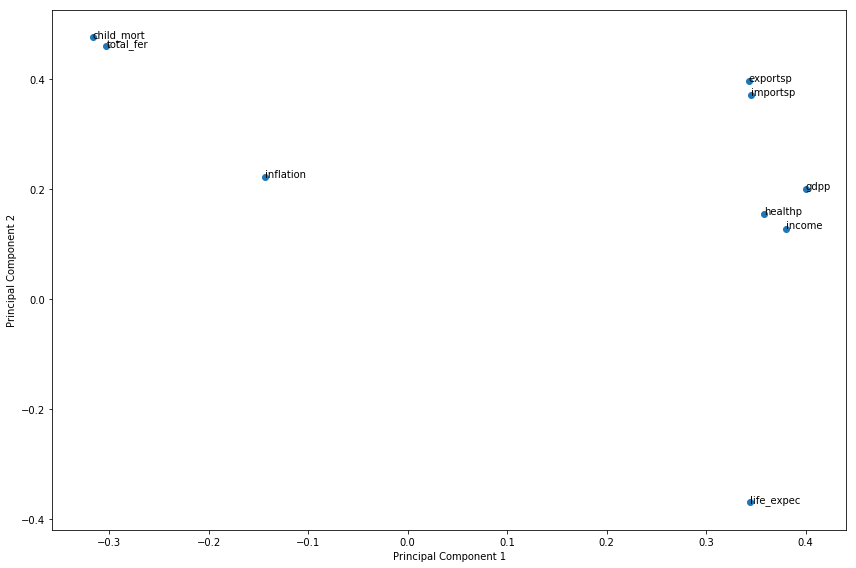

In [20]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.index):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

The PC1 mainly captures variance of 'gdpp' whereas PC2 mainly captures 'child_mort' feature.

#### Creating correlation-coeff matrix for the principal components to confirm that the principal components are orthogonal to each other i.e., correlation coefficients are close to zero meaning there is no correlation between the various principal components generated.

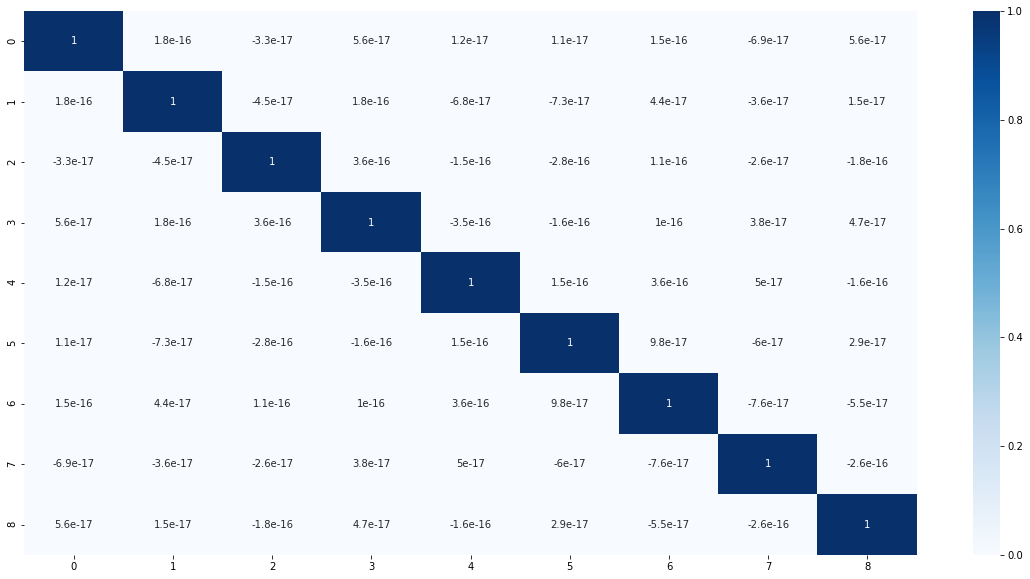

In [21]:
corrmat = np.corrcoef(countries_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True,cmap='Blues')
plt.show()

In [22]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 3.619999821102972e-16 , min corr:  -3.5298142903278303e-16


In [23]:
# Percentage of variance explained by each of the principal components
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [58.9 18.4  9.9  6.1  3.   2.5  0.9  0.2  0. ]


In [24]:
# Cumulative-variance explained by the principal components
print (pca.explained_variance_ratio_.cumsum())

[0.5893721  0.7738227  0.87293756 0.93366223 0.96395362 0.98855195
 0.99794935 0.99950602 1.        ]


### Generating Scree-Plot to determine optimum number of Principal Components

#### Making the screeplot - plotting the cumulative variance against the number of components

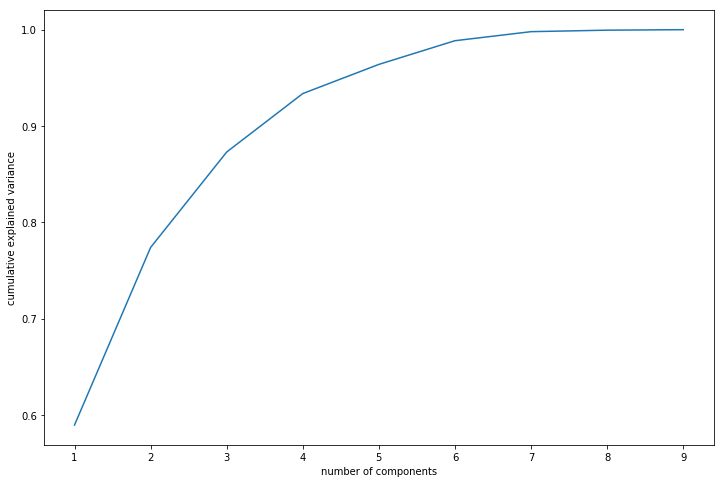

In [25]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt1 = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(9),np.arange(1,10))
plt.show()

Looking at the **Scree-Plo**t and the **Cumulative-Variance numbers**, we notice that **3 Principal Components** are sufficient to **explain ~87% variance in the dataset**. 

This is a good dimension reduction from **9 original features** to **3 Principal Components** with 87% data variation explanation. 

Hence, we go ahead with creating a PCA model to generate **3 Principal components**.

Improved PCA(IPCA) is used only when the dataset is very large so as to achieve memory and computational benefit. The given dataset is small and hence PCA would be used to find the Principal Components.

#### PCA Model to generate 3 Principal Components
* fit_transform() Data   

In [26]:
pca_3 = PCA(n_components=3,random_state=100,svd_solver='full')
countries_pca_3 = pca_3.fit_transform(countries_std[num_vars])

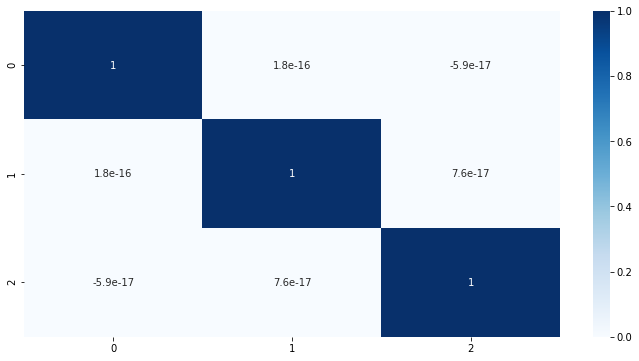

In [27]:
# Generate correlation-coeff heatmap to check for orthogonality
corrmat_pca_3 = np.corrcoef(countries_pca_3.transpose())
plt.figure(figsize = (12,6))
sns.heatmap(corrmat_pca_3,annot = True,cmap='Blues')
plt.show()

In [28]:
# 1s -> 0s in diagonals
corrmat_nodiag_pca_3 = corrmat_pca_3 - np.diagflat(corrmat_pca_3.diagonal())
print("max corr:",corrmat_nodiag_pca_3.max(), ", min corr: ", corrmat_nodiag_pca_3.min(),)
# we see that correlations are indeed very close to 0/

max corr: 1.8354422860700424e-16 , min corr:  -5.854453919868783e-17


### Hopkins Statistics on complete dataset transformed with 3 principal components

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
hopkins(pd.DataFrame(countries_pca_3))

0.9491691908190918


#### Since the Hopkin Score is > 0.9 ( 0.94 on the recent run ) , the data has high tendency to provide good clusters.

In [30]:
# Convert the PCA array into a dataframe and include country and original features
df_countries_pca_3 = pd.concat([countries.country,\
                               pd.DataFrame(countries_pca_3)],\
                              axis=1)
df_countries_pca_3.columns = ['country','PC1','PC2','PC3']
df_countries_pca_3 = df_countries_pca_3.merge(countries)
df_countries_pca_3.head()

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.635581,1.472248,-0.549494,90.2,55,42,248,1610,9.44,56.2,5.82,553
1,Albania,-0.024183,-1.429880,-0.014122,16.6,1145,268,1988,9930,4.49,76.3,1.65,4090
2,Algeria,-0.459561,-0.675499,0.959359,27.3,1713,186,1400,12900,16.10,76.5,2.89,4460
3,Angola,-2.722576,2.172339,0.600195,119.0,2199,101,1514,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,0.648668,-1.023399,-0.257439,10.3,5551,736,7186,19100,1.44,76.8,2.13,12200


In [31]:
# Principal Component Valrable List
pc_vars=['PC1','PC2','PC3']

### Outlier Treatment

#### Generate boxplots for each of the original numeric features of the dataframe to get a visual feel of the outliers

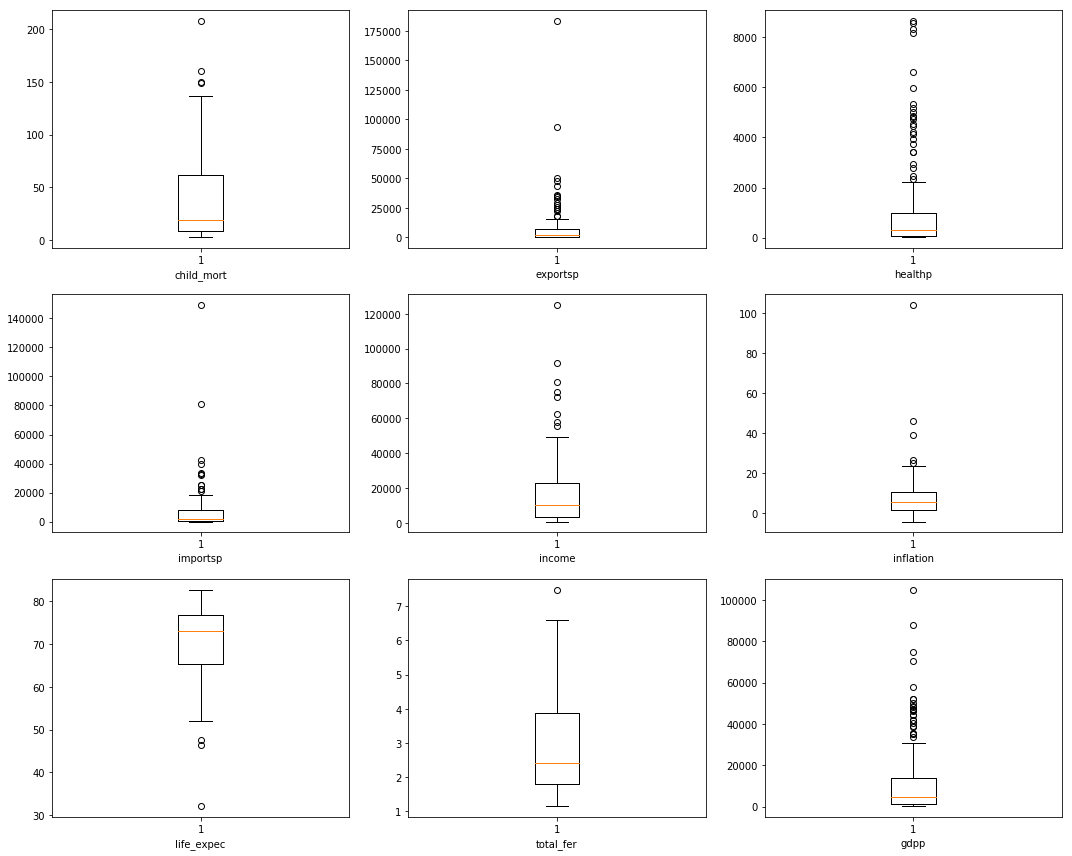

In [32]:
plt.figure(figsize=(15,12))
for i,col in enumerate(num_vars):
    plt.subplot(3,3,i+1)
    plt.boxplot(df_countries_pca_3[col])
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

All the numeric features have outliers. 

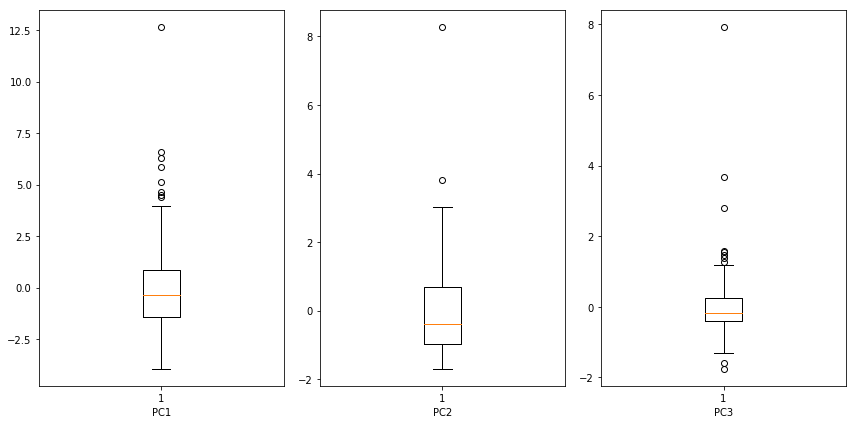

In [33]:
plt.figure(figsize=(12,6))
for i,col in enumerate(pc_vars):
    plt.subplot(1,3,i+1)
    plt.boxplot(df_countries_pca_3[col])
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

As expected, all the 3 Principal Components have outliers. 

Outliers will be removed based on the **Principal Cmponents** using the **Inter-Quartile Range** Method, where in any data point lying **beyond _(Q1 - 1.5*IQR)_ and _(Q3 + 1.5*IQR)_** are assumed to be outliers and removed.

In [34]:
# Create a new dataframe 'df_countries_pca_3_iqr' with records lying in the inter quartile range
df_countries_pca_3_iqr = df_countries_pca_3.copy(deep=True)
print("Removing Outliers that lie beyond the Lower and Upper Inner Fences as mentioned below.\n")
for col in pc_vars:
    Q1 = df_countries_pca_3_iqr[col].quantile(0.25)
    Q3 = df_countries_pca_3_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    df_countries_pca_3_iqr = df_countries_pca_3_iqr[(df_countries_pca_3_iqr[col] >= Q1 - 1.5*IQR) & \
                                                    (df_countries_pca_3_iqr[col] <= Q3 + 1.5*IQR)]
    print("{:<10} : Lower-Inner Fence(Q1 - 1.5*IQR) = {:<10} , Upper-Inner Fence(Q3 + 1.5*IQR) = {}".\
         format(col,round((Q1 - 1.5*IQR),2),round((Q3 + 1.5*IQR),2)))

Removing Outliers that lie beyond the Lower and Upper Inner Fences as mentioned below.

PC1        : Lower-Inner Fence(Q1 - 1.5*IQR) = -4.89      , Upper-Inner Fence(Q3 + 1.5*IQR) = 4.29
PC2        : Lower-Inner Fence(Q1 - 1.5*IQR) = -3.2       , Upper-Inner Fence(Q3 + 1.5*IQR) = 2.71
PC3        : Lower-Inner Fence(Q1 - 1.5*IQR) = -1.35      , Upper-Inner Fence(Q3 + 1.5*IQR) = 1.22


In [35]:
# Create another dataframe 'df_countries_pca_3_outl' with outlier records
df_countries_pca_3_outl = pd.concat([df_countries_pca_3,df_countries_pca_3_iqr]).drop_duplicates(keep=False)    

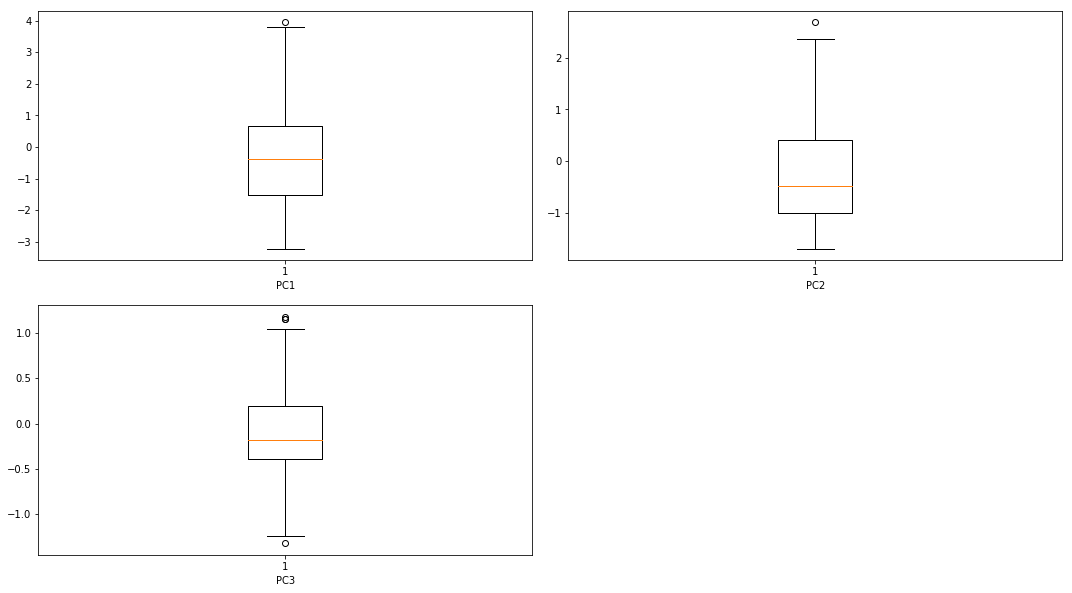

In [36]:
# Regenerate the bxplots to check for dataframe after outlier treatment
plt.figure(figsize=(15,12))
for i,col in enumerate(pc_vars):
    plt.subplot(3,2,i+1)
    plt.boxplot(df_countries_pca_3_iqr[col])
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

Very less outliers found after outlier treatment.

In [37]:
#Reset index of the arrays for ease of processing in later stages
df_countries_pca_3_iqr.set_index(np.arange(len(df_countries_pca_3_iqr)),inplace=True)
df_countries_pca_3_outl.set_index(np.arange(len(df_countries_pca_3_outl)),inplace=True)

In [38]:
print("Shape of :")
print("Original  'df_countries_pca_3'      Dataframe:  {}\n\
Inlier    'df_countries_pca_3_iqr'  Dataframe:  {}\n\
Outlier   'df_countries_pca_3_outl' Dataframe:  {}".\
      format(df_countries_pca_3.shape,df_countries_pca_3_iqr.shape,df_countries_pca_3_outl.shape))

Shape of :
Original  'df_countries_pca_3'      Dataframe:  (167, 13)
Inlier    'df_countries_pca_3_iqr'  Dataframe:  (149, 13)
Outlier   'df_countries_pca_3_outl' Dataframe:  (18, 13)


In [39]:
df_countries_pca_3_iqr.columns

Index(['country', 'PC1', 'PC2', 'PC3', 'child_mort', 'exportsp', 'healthp', 'importsp', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype='object')

### Scatter Plot of PCs

Plotting the first two principal components i.e., PC1 vs PC2 to get a feel of how the original features are projected on these transformed principal components.

Also, PC1 should be orthogonal to PC2 , meaning there shouldn't be any linear correlation ebtween these components.

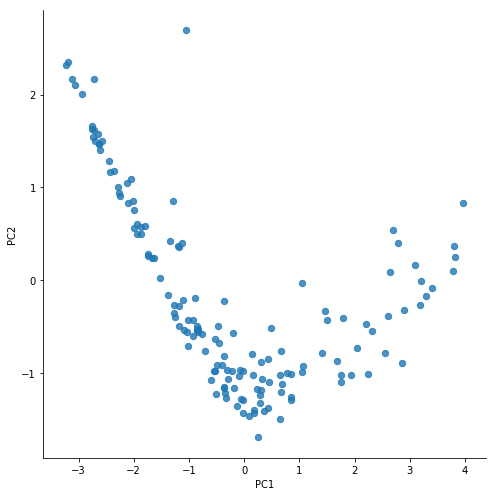

In [40]:
# PC1 vs PC2
sns.lmplot( x="PC1", y="PC2",
  data=df_countries_pca_3_iqr, 
  fit_reg=False,
  #hue='gdpp', # color by cluster
  legend=False,
  scatter_kws={"s": 40},height=7) # specify the point size
plt.show()

In [41]:
# Function to plot PC ( Principal Components) vs Original Features
def pc_vs_feature(df,x,var_list):
    plt.figure(figsize=(12,9))
    for i,col in enumerate(var_list):
        plt.subplot(3,3,i+1)
        plt.scatter(x=df[x],y=df[col])
        plt.xlabel(x)
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

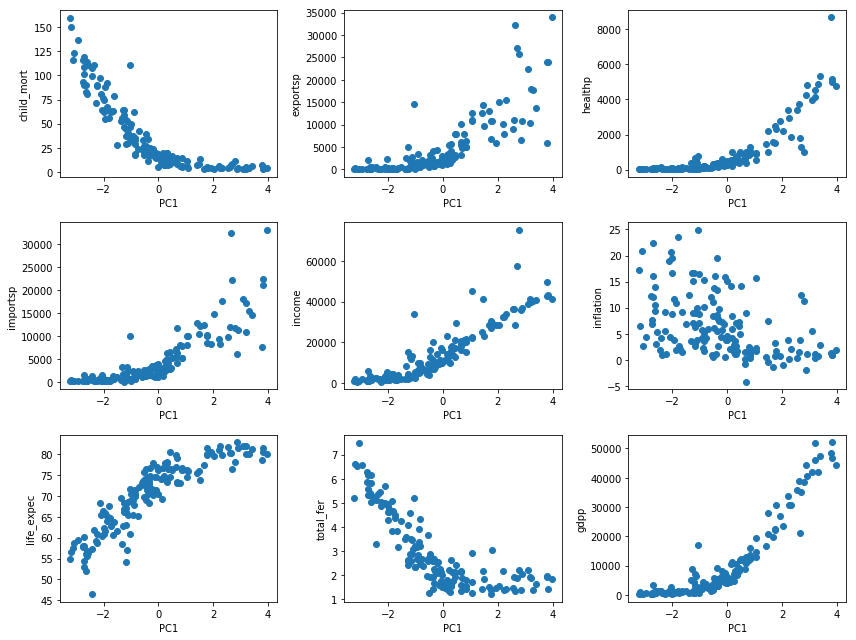

In [42]:
# PC1 vs Original Features
pc_vs_feature(df=df_countries_pca_3_iqr,x='PC1',var_list=num_vars)

The plots reaffirm that PC1 has very strong correlations with 'gdpp' , 'child_mort', 'income', 'life_expec', 'total_fer'.

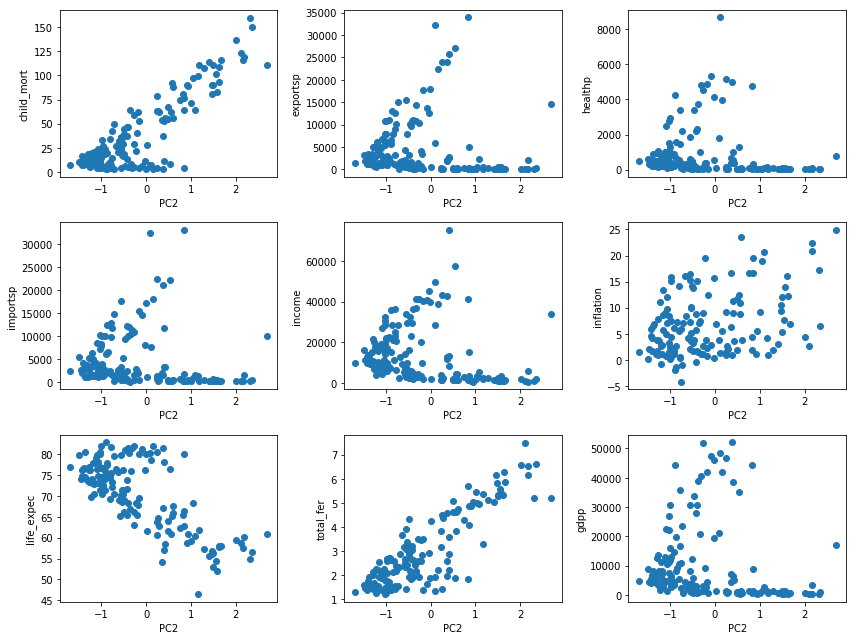

In [43]:
# PC2 vs Original Features
pc_vs_feature(df=df_countries_pca_3_iqr,x='PC2',var_list=num_vars)

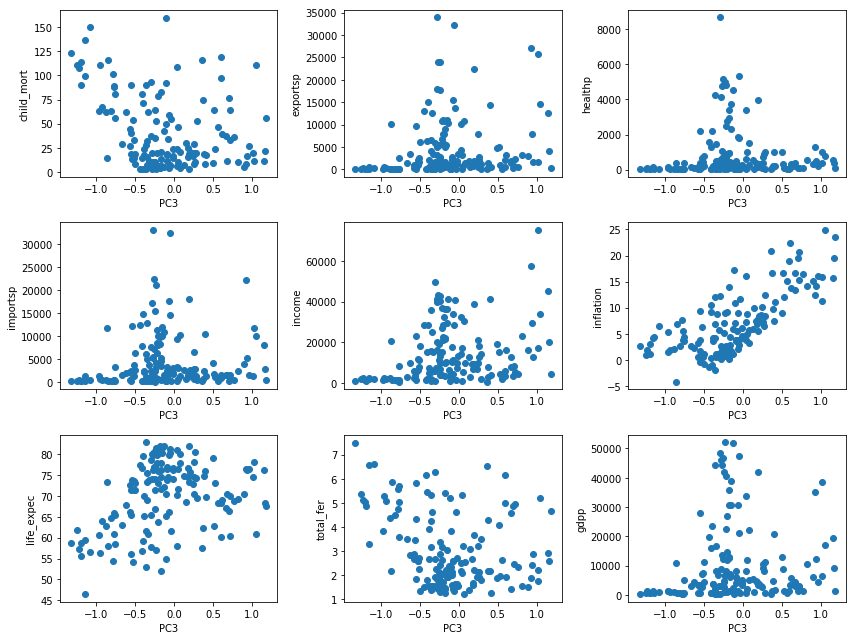

In [44]:
# PC3 vs Original Features
pc_vs_feature(df=df_countries_pca_3_iqr,x='PC3',var_list=num_vars)

The plots indicate that PC3 has moderate correlations with 'inflation.'

### Hopkins Measure : Again just for the Inlier Data

In [45]:
hopkins(df_countries_pca_3_iqr[pc_vars])

0.8483494300448386

### K-Means Clustering

In [46]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

#### Generate a Silhouette Grap to determine the optimum number of cluster to be created.

In [47]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k,random_state=100).fit(df_countries_pca_3_iqr[pc_vars])
    sse_.append([k, silhouette_score(df_countries_pca_3_iqr[pc_vars], kmeans.labels_)])

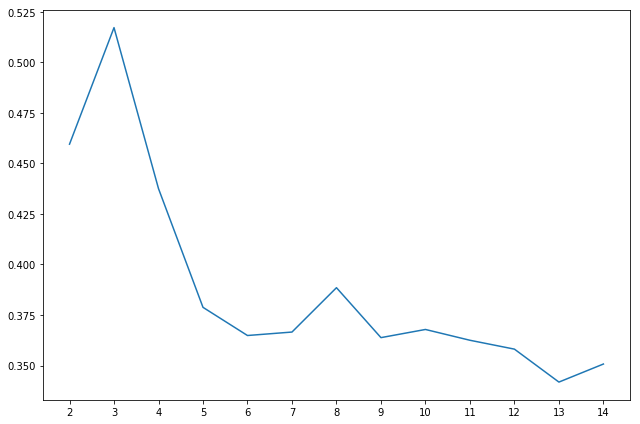

In [48]:
plt.figure(figsize=(9,6))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.xticks(range(2,15))
plt.tight_layout()
plt.show()

A value closer to 1 indicates that it is a good candidiate for choosing that as the ideal number of cluster.

However, a balance has to be maintained in choosing the number of clusters.

Considering these facts, we can look at clustering the data in either 3 Clusters or 4 Clusters. Depending on the results, we can decide on which clustering provides us with bettr insights.

#### Elbow Test

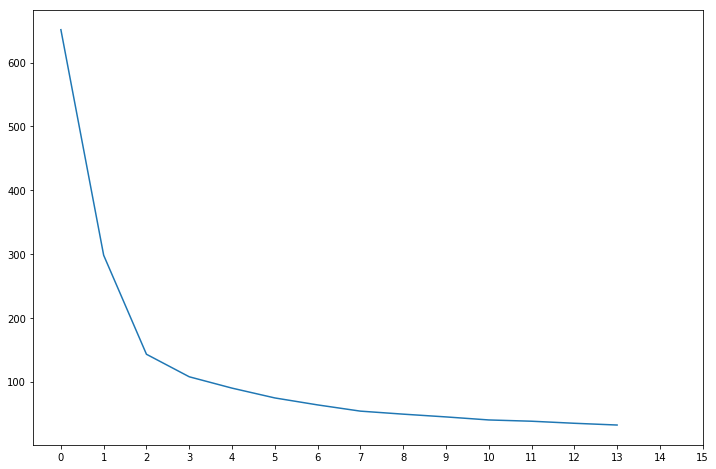

In [49]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,15)):
    model_clus_x = KMeans(n_clusters = num_clusters, max_iter=50,random_state=100)
    model_clus_x.fit(df_countries_pca_3_iqr[pc_vars])
    ssd.append(model_clus_x.inertia_)


plt.figure(figsize=(12,8))    
plt.plot(ssd)
plt.xticks(range(16))

plt.show()

Even with Elbow Test, it appears that the number of clusters could be either 3 or 4 to get optimum results.

## Kmeans with K=3

In [50]:
# Fit the 'Inlier' data in KMeans model with 3-Clusters
model_clus_3 = KMeans(n_clusters = 3, max_iter=50,random_state=100)
model_clus_3.fit(df_countries_pca_3_iqr[pc_vars])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [51]:
#Save Labels i.e., Clusters to another variable
cluster_countries_iqr_3 =  model_clus_3.labels_
cluster_countries_iqr_3

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0,
       0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2])

In [52]:
countries_iqr_km3 = pd.concat([df_countries_pca_3_iqr,\
                               pd.DataFrame(cluster_countries_iqr_3)],\
                              axis=1)
countries_iqr_km3.rename(columns={0:'Cluster'}, inplace=True)
countries_iqr_km3.head()

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,-2.635581,1.472248,-0.549494,90.2,55,42,248,1610,9.44,56.2,5.82,553,2
1,Albania,-0.024183,-1.429880,-0.014122,16.6,1145,268,1988,9930,4.49,76.3,1.65,4090,0
2,Algeria,-0.459561,-0.675499,0.959359,27.3,1713,186,1400,12900,16.10,76.5,2.89,4460,0
3,Angola,-2.722576,2.172339,0.600195,119.0,2199,101,1514,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,0.648668,-1.023399,-0.257439,10.3,5551,736,7186,19100,1.44,76.8,2.13,12200,0


In [53]:
countries_iqr_km3.shape

(149, 14)

In [54]:
countries_iqr_km3.Cluster.value_counts()

0    77
2    44
1    28
Name: Cluster, dtype: int64

In [55]:
for col in num_vars:
    print("\nFeature : {}\n".format(col))
    display(countries_iqr_km3.groupby('Cluster')[col].agg(['min','mean','max']).T\
    .rename(columns={0:'PC1',1:'PC2',2:'PC3'}))


Feature : child_mort



Cluster,PC1,PC2,PC3
min,4.500000,2.600000,28.100000
mean,22.277922,5.292857,87.447727
max,64.400000,13.800000,160.000000



Feature : exportsp



Cluster,PC1,PC2,PC3
min,1.000000,5945.000000,21.00
mean,2747.480519,15197.535714,940.25
max,12680.000000,33922.000000,14672.00



Feature : healthp



Cluster,PC1,PC2,PC3
min,19.000000,1013.000000,13.000000
mean,385.454545,3302.857143,113.681818
max,1275.000000,8664.000000,766.000000



Feature : importsp



Cluster,PC1,PC2,PC3
min,1.00000,6052.0,91.000000
mean,2924.61039,14347.5,857.909091
max,11664.00000,33167.0,10072.000000



Feature : income



Cluster,PC1,PC2,PC3
min,1990.000000,22900.000000,609.000000
mean,11845.714286,37310.714286,4038.295455
max,45300.000000,75200.000000,33700.000000



Feature : inflation



Cluster,PC1,PC2,PC3
min,-4.210000,-1.900000,0.885000
mean,6.312455,2.192964,9.858523
max,19.500000,12.500000,24.900000



Feature : life_expec



Cluster,PC1,PC2,PC3
min,63.000000,73.800000,46.500
mean,72.909091,79.785714,59.825
max,80.400000,82.800000,68.200



Feature : total_fer



Cluster,PC1,PC2,PC3
min,1.250000,1.230000,2.5900
mean,2.273896,1.753214,4.9775
max,4.340000,3.030000,7.4900



Feature : gdpp



Cluster,PC1,PC2,PC3
min,592.000000,16600.000000,231.000000
mean,6065.090909,35042.857143,1922.818182
max,19300.000000,52100.000000,17100.000000


In [56]:
def custom_plot(df,var_list,plot_type):
    plt.figure(figsize=(12,8))
    num_row_col = round(np.sqrt(len(var_list)))
    
    if plot_type == 'bar':
        for i,col in enumerate(var_list):
            plt.subplot(num_row_col,num_row_col,i+1)
            sns.barplot(x=df.Cluster, y=df[col],ci=None)
    if plot_type == 'box':
        for i,col in enumerate(var_list):
            plt.subplot(num_row_col,num_row_col,i+1)
            sns.boxplot(x=df.Cluster, y=df[col])
    plt.tight_layout()
    plt.show()  

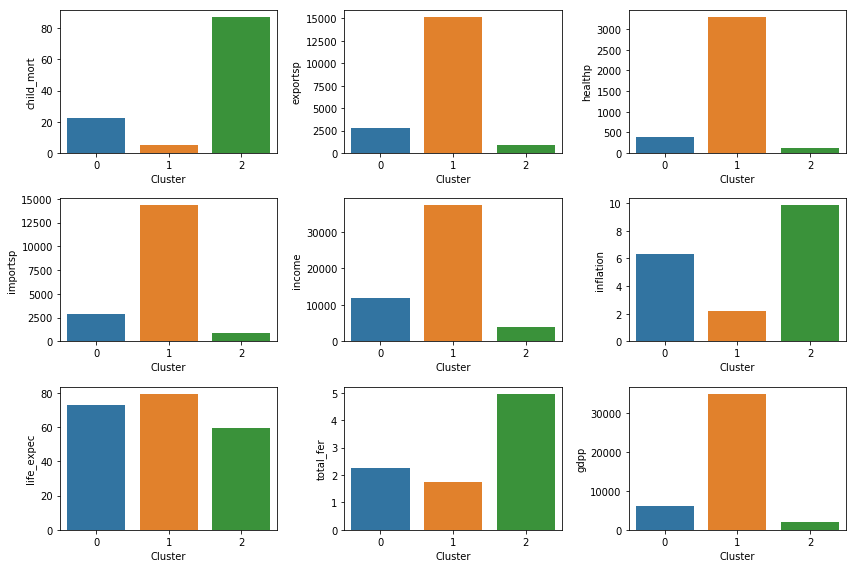

In [57]:
# Bar-plot cluster vs each of the Original Numerical Components
custom_plot(df=countries_iqr_km3,var_list=num_vars,plot_type='bar')

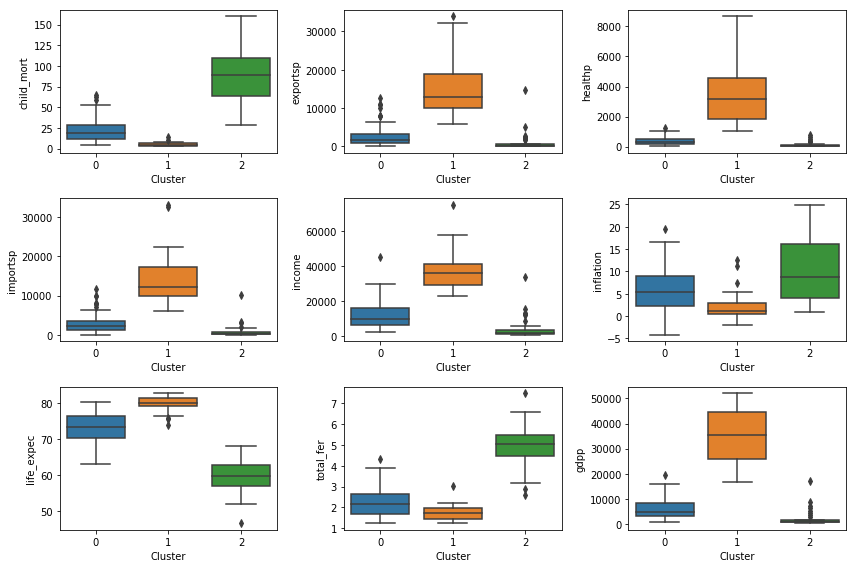

In [58]:
# Box-plot cluster vs each of the Original features
custom_plot(df=countries_iqr_km3,var_list=num_vars,plot_type='box')

Highly influential factors in classification of the countries are :      
**Child Mortality Rate, Income Level, Life Expectancy, Total Fertality and GDPP.**

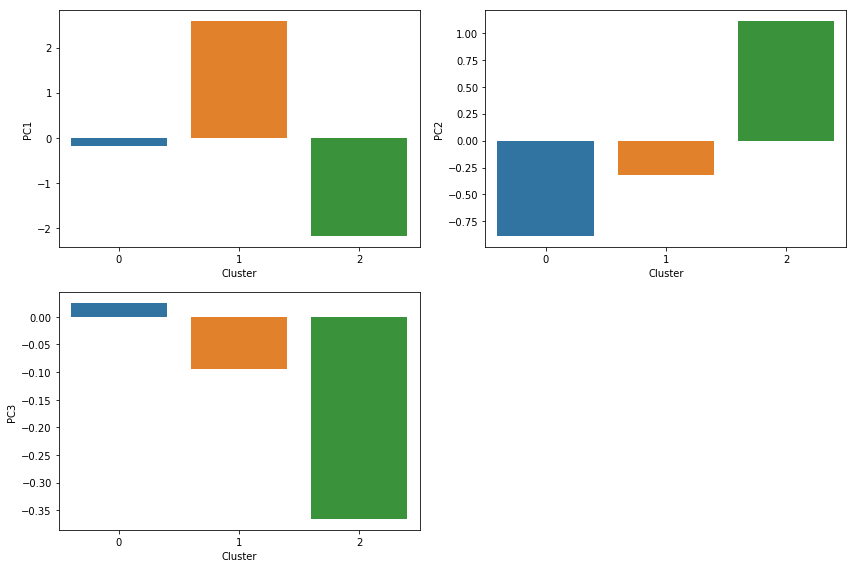

In [59]:
# Bar-plot cluster vs each of the Principal Components
custom_plot(df=countries_iqr_km3,var_list=pc_vars,plot_type='bar')

In [60]:
summary_km3 = countries_iqr_km3.groupby('Cluster')['gdpp'].\
agg({'Mean':'mean','Count' : 'count'}).\
sort_values(by='Mean').reset_index().\
drop('Mean',axis=1)

summary_km3['Remark'] = pd.Series(['Under-Developed','Developing','Developed'])
summary_km3

,Cluster,Count,Remark
0,2,44,Under-Developed
1,0,77,Developing
2,1,28,Developed


In [61]:
# Function for plotting scatter plots
def custom_scatter(df,x_var,y_var,hue_var,summary_df):
    l = sns.lmplot( x=x_var, y=y_var,
               data=df, 
               fit_reg=False, 
               hue=hue_var, # color by cluster
               legend=False,
               scatter_kws={"s": 25}, # specify the point size
               height=8,
               aspect=2)
    labels = list(summary_df.iloc[:,-1])
    plt.legend(loc='upper right',labels=labels)
    plt.show() 

#### Scatter plot of Principal Components : PC1 vs PC2 based on Clusters

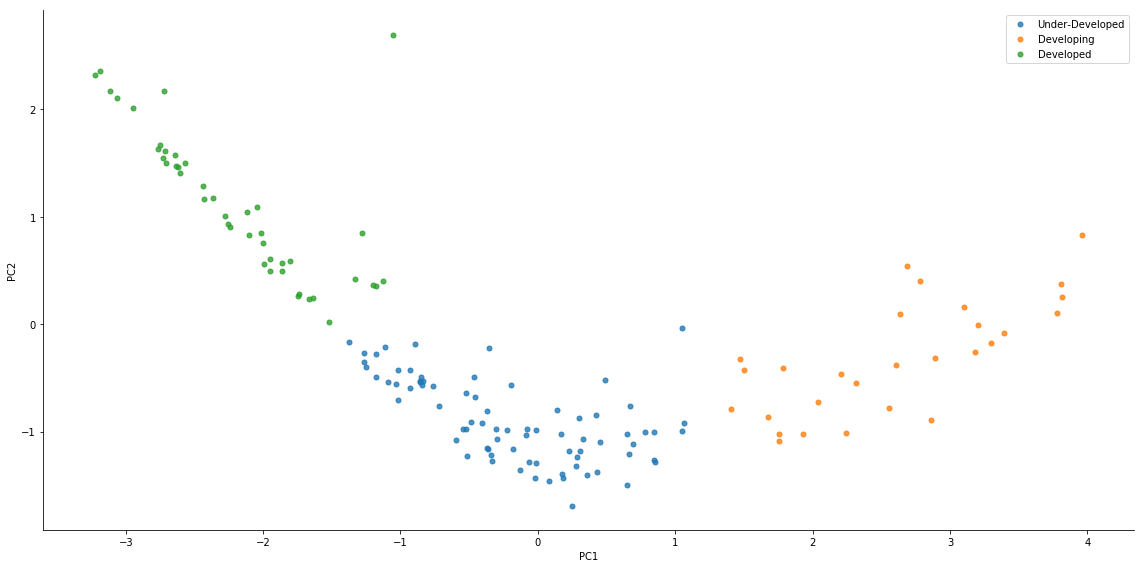

In [62]:
custom_scatter(df=countries_iqr_km3,x_var='PC1',y_var='PC2',hue_var='Cluster',summary_df=summary_km3)

#### Scatter plot of Original Features: GDPP vs Income based on Clusters

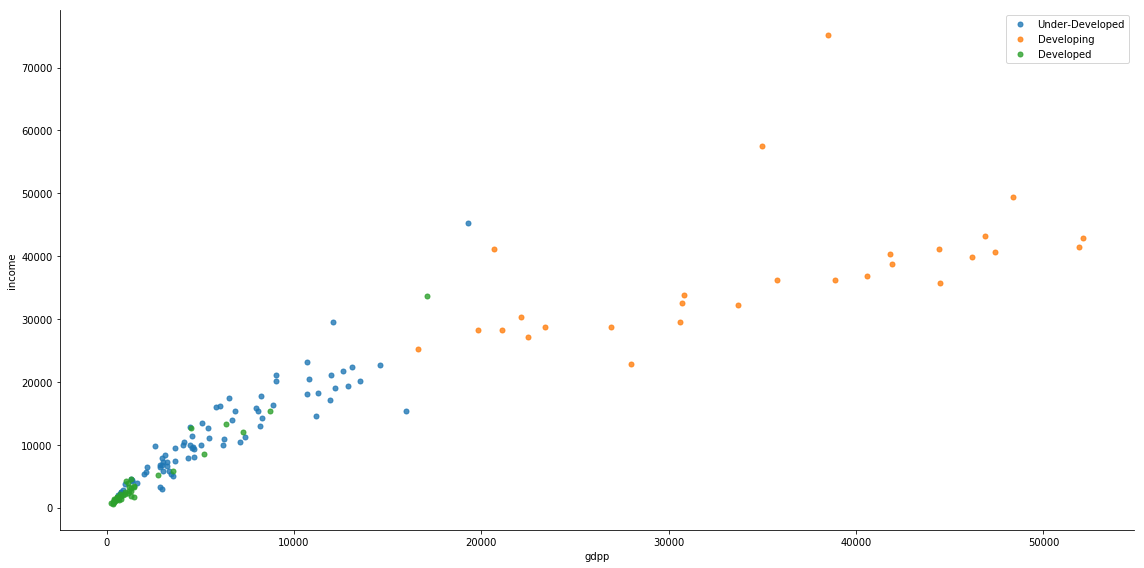

In [63]:
custom_scatter(df=countries_iqr_km3,x_var='gdpp',y_var='income',hue_var='Cluster',summary_df=summary_km3)

#### Scatter plot of Original Features: GDPP vs Child Mortality based on Clusters

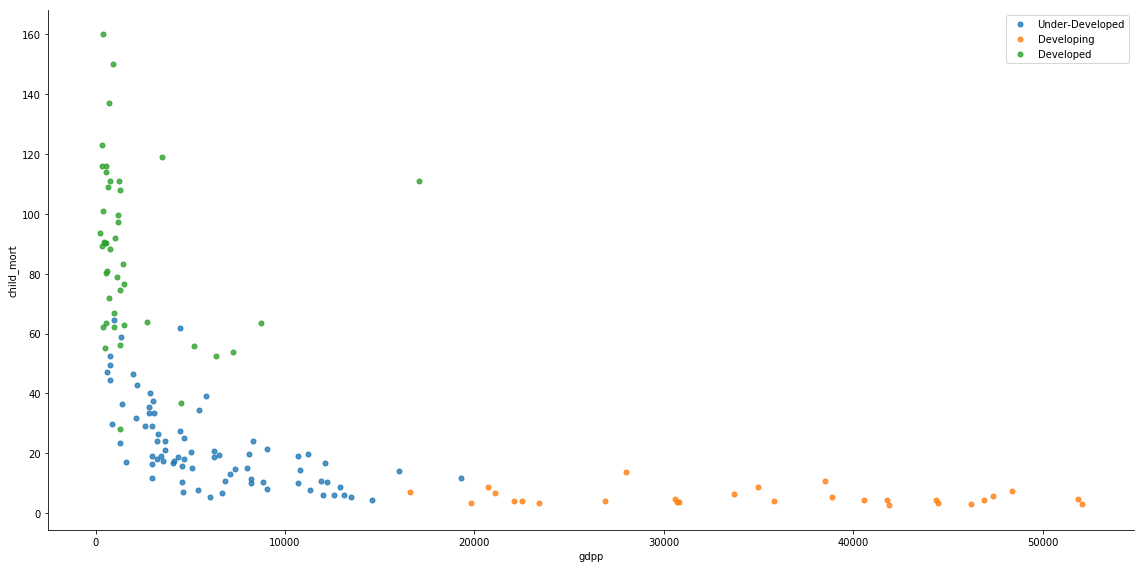

In [64]:
custom_scatter(df=countries_iqr_km3,x_var='gdpp',y_var='child_mort',hue_var='Cluster',summary_df=summary_km3)

#### Scatter plot of Original Features: GDPP vs Life Expectancy based on Clusters

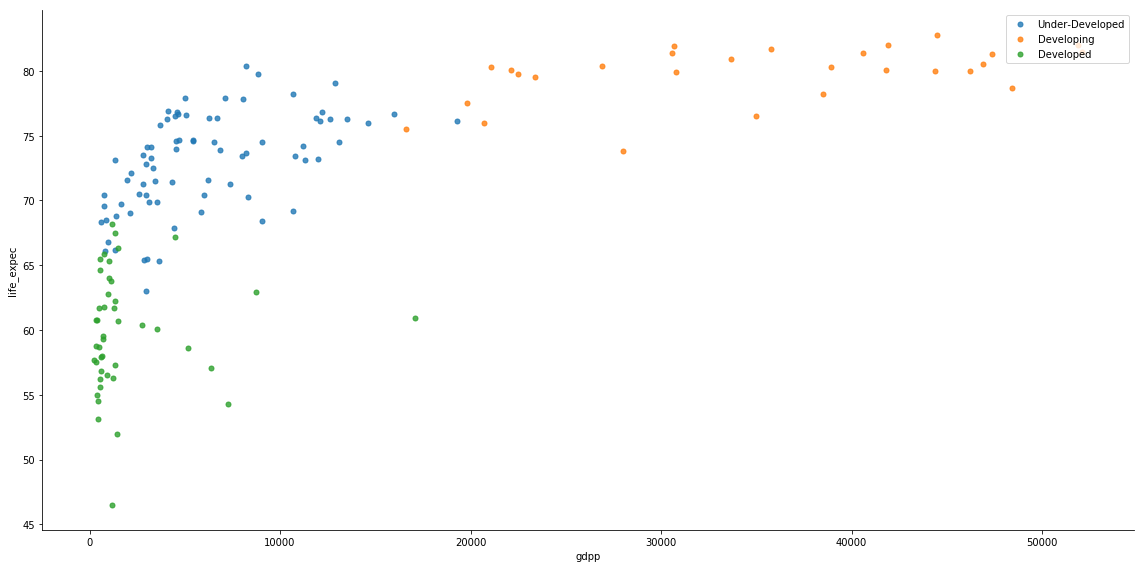

In [65]:
custom_scatter(df=countries_iqr_km3,x_var='gdpp',y_var='life_expec',hue_var='Cluster',summary_df=summary_km3)

#### Scatter plot of Original Features: GDPP vs PC1 based on Clusters

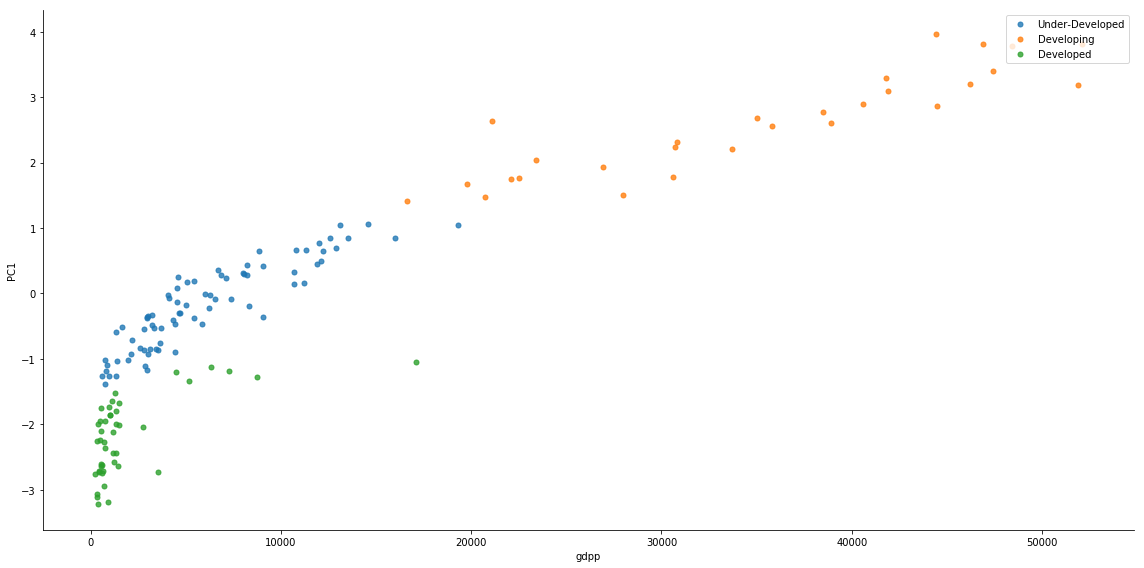

In [66]:
custom_scatter(df=countries_iqr_km3,x_var='gdpp',y_var='PC1',hue_var='Cluster',summary_df=summary_km3)

#### Scatter plot of Original Features: Child_mort vs PC2 based on Clusters

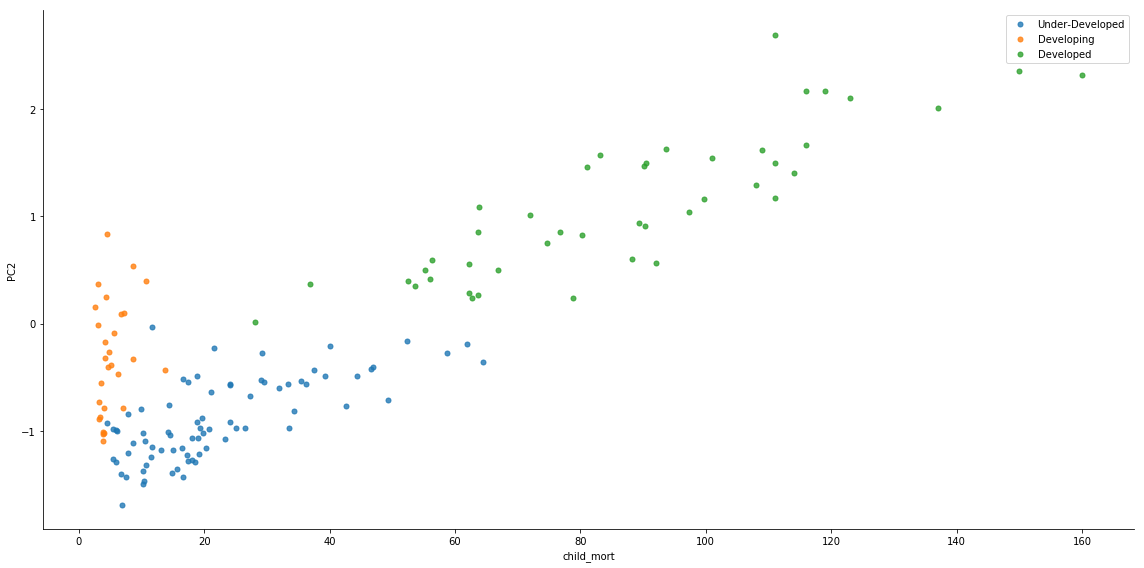

In [67]:
custom_scatter(df=countries_iqr_km3,x_var='child_mort',y_var='PC2',hue_var='Cluster',summary_df=summary_km3)

* GDPP and Income are linearly dependent.   
* As GDPP(Income) increases Child Mortality Decreases and Life Expectancy Increases.
* Under-Developed countries are characterised by Low GDPP(Income), Low Life Expectancy and High Child Mortallity.   
* Developed countries are characterised by High GDPP(Income), High Life Expectancy and Low Child Mortallity.   
* The Developing inter-sparced between Backward and Developed Countries.

** Let's try with the number of clusters as 4 and see if we get a better clustering.**

## Kmeans with K=4

In [68]:
# Fit the 'Inlier' data in KMeans model - 4-Clusters
model_clus_4 = KMeans(n_clusters = 4, max_iter=50,random_state=100)
model_clus_4.fit(df_countries_pca_3_iqr[pc_vars])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [69]:
#Save Labels i.e., Clusters to another variable
cluster_countries_iqr_4 =  model_clus_4.labels_
cluster_countries_iqr_4

array([1, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 3, 0, 0, 2, 0, 1, 0, 3, 0, 3, 0,
       0, 1, 1, 3, 1, 2, 0, 1, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 2, 0, 0, 3,
       0, 1, 3, 0, 3, 2, 2, 3, 1, 0, 2, 3, 2, 0, 3, 1, 1, 3, 0, 2, 3, 3,
       0, 3, 2, 2, 0, 2, 0, 0, 3, 3, 2, 3, 3, 0, 0, 1, 1, 0, 0, 0, 3, 1,
       0, 0, 1, 2, 1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 2, 1, 0, 3, 0, 0, 0, 3,
       0, 2, 0, 0, 3, 3, 3, 0, 0, 1, 2, 2, 3, 3, 2, 2, 0, 3, 0, 2, 3, 1,
       0, 1, 3, 0, 0, 3, 1, 0, 2, 2, 2, 0, 3, 3, 0, 3, 1])

In [70]:
# Create a dataframe of the 4-Means cluster and append the cluster information
countries_iqr_km4 = pd.concat([df_countries_pca_3_iqr,\
                               pd.DataFrame(cluster_countries_iqr_4)],\
                              axis=1)
countries_iqr_km4.rename(columns={0:'Cluster'}, inplace=True)
countries_iqr_km4.head()

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,-2.635581,1.472248,-0.549494,90.2,55,42,248,1610,9.44,56.2,5.82,553,1
1,Albania,-0.024183,-1.429880,-0.014122,16.6,1145,268,1988,9930,4.49,76.3,1.65,4090,0
2,Algeria,-0.459561,-0.675499,0.959359,27.3,1713,186,1400,12900,16.10,76.5,2.89,4460,0
3,Angola,-2.722576,2.172339,0.600195,119.0,2199,101,1514,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,0.648668,-1.023399,-0.257439,10.3,5551,736,7186,19100,1.44,76.8,2.13,12200,0


In [71]:
# Check for shape to be still having the same number of rows
countries_iqr_km4.shape

(149, 14)

In [72]:
countries_iqr_km4.Cluster.value_counts()

0    57
3    38
2    28
1    26
Name: Cluster, dtype: int64

In [73]:
for col in num_vars:
    print("\nFeature : {}\n".format(col))
    display(countries_iqr_km4.groupby('Cluster')[col].agg(['min','mean','max']).T\
    .rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4'}))


Feature : child_mort



Cluster,PC1,PC2,PC3,PC4
min,4.500000,63.900000,2.600000,17.400000
mean,16.273684,104.507692,5.292857,50.481579
max,42.700000,160.000000,13.800000,92.100000



Feature : exportsp



Cluster,PC1,PC2,PC3,PC4
min,639.000000,21.0,5945.000000,1.000000
mean,3429.561404,923.0,15197.535714,880.105263
max,12680.000000,14672.0,33922.000000,5049.000000



Feature : healthp



Cluster,PC1,PC2,PC3,PC4
min,90.000000,18.000000,1013.000000,13.000000
mean,479.631579,76.153846,3302.857143,141.131579
max,1275.000000,766.000000,8664.000000,651.000000



Feature : importsp



Cluster,PC1,PC2,PC3,PC4
min,1031.000000,91.000000,6052.0,1.000000
mean,3578.824561,779.346154,14347.5,1018.078947
max,11664.000000,10072.000000,33167.0,3258.000000



Feature : income



Cluster,PC1,PC2,PC3,PC4
min,3910.000000,609.000000,22900.000000,1350.000000
mean,14247.192982,3189.038462,37310.714286,5126.315789
max,45300.000000,33700.000000,75200.000000,15400.000000



Feature : inflation



Cluster,PC1,PC2,PC3,PC4
min,-4.210000,0.885000,-1.900000,1.520000
mean,5.930684,10.104038,2.192964,8.396842
max,19.500000,24.900000,12.500000,23.600000



Feature : life_expec



Cluster,PC1,PC2,PC3,PC4
min,68.400000,46.500000,73.800000,54.300000
mean,74.535088,57.880769,79.785714,65.602632
max,80.400000,68.200000,82.800000,71.600000



Feature : total_fer



Cluster,PC1,PC2,PC3,PC4
min,1.250000,3.300000,1.230000,2.330000
mean,2.009474,5.557692,1.753214,3.554211
max,3.660000,7.490000,3.030000,5.060000



Feature : gdpp



Cluster,PC1,PC2,PC3,PC4
min,1310.000000,231.000000,16600.000000,413.000000
mean,7419.824561,1510.769231,35042.857143,2352.789474
max,19300.000000,17100.000000,52100.000000,8750.000000


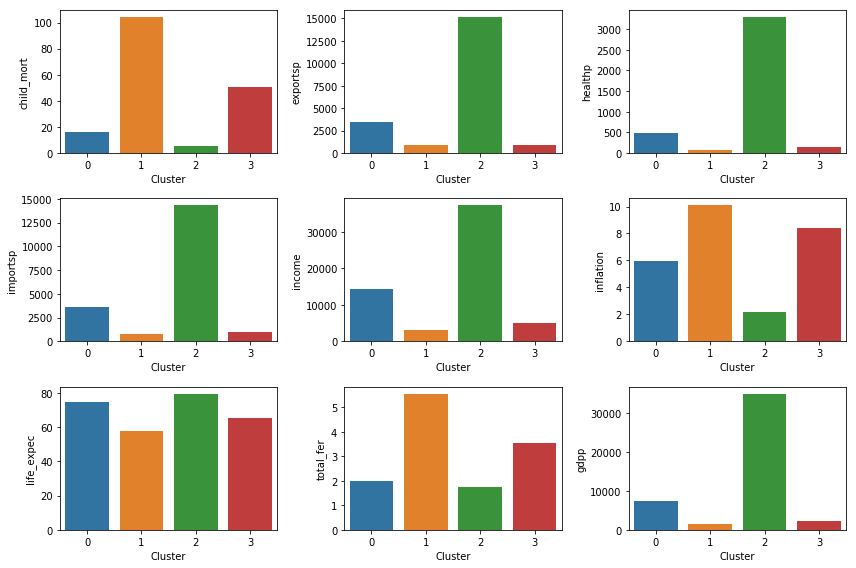

In [74]:
# Bar-plot cluster vs each of the features
custom_plot(df=countries_iqr_km4,var_list=num_vars,plot_type='bar')

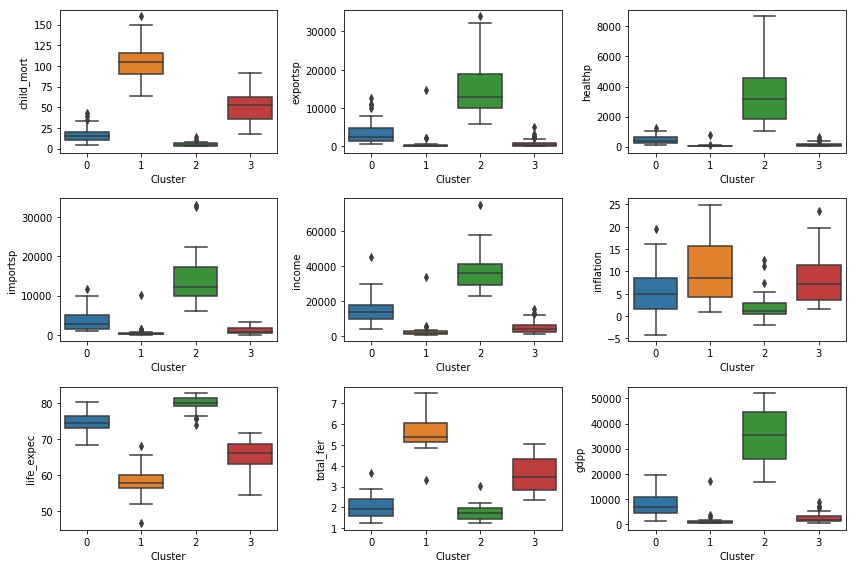

In [75]:
# Box-plot cluster vs each of the features
custom_plot(df=countries_iqr_km4,var_list=num_vars,plot_type='box')

Highly influential factors in classification of the countries are :   
**Child Mortality Rate, Income Level, Life Expectancy, Total Fertality and GDPP.**

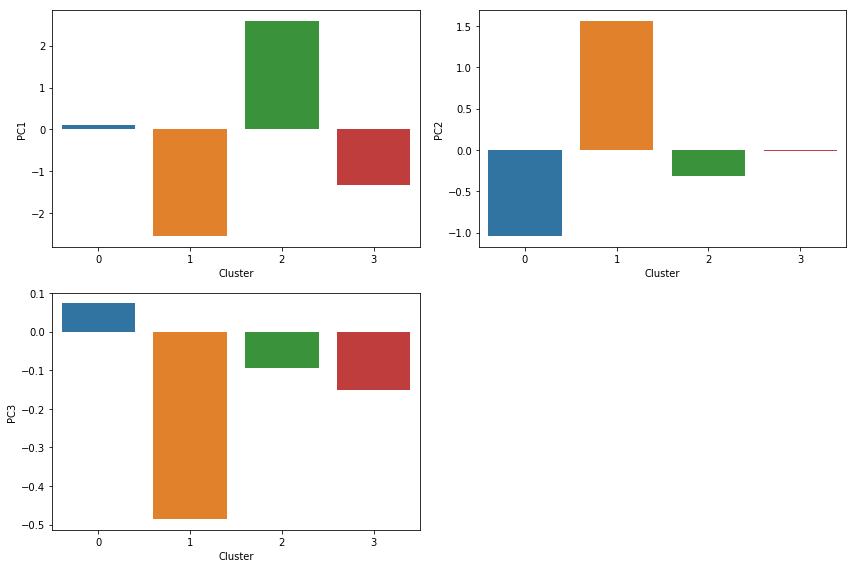

In [76]:
# Bar-plot cluster vs each of the Principal Components
custom_plot(df=countries_iqr_km4,var_list=pc_vars,plot_type='bar')

In [77]:
summary_km4 = countries_iqr_km4.groupby('Cluster')['gdpp'].\
agg({'Mean':'mean','Count' : 'count'}).\
sort_values(by='Mean').reset_index().\
drop('Mean',axis=1)

summary_km4['Remark'] = pd.Series(['Backward','Under-Developed','Developing','Developed'])
summary_km4

,Cluster,Count,Remark
0,1,26,Backward
1,3,38,Under-Developed
2,0,57,Developing
3,2,28,Developed


#### Scatter plot of Principal Components : PC1 vs PC2 based on Clusters

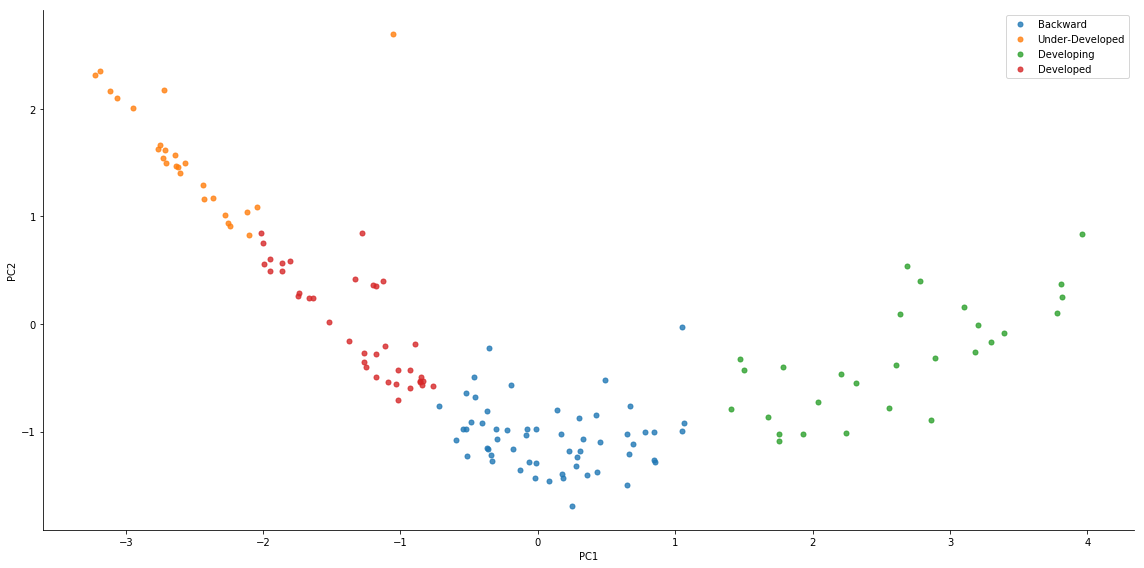

In [78]:
custom_scatter(df=countries_iqr_km4,x_var='PC1',y_var='PC2',hue_var='Cluster',summary_df=summary_km4)

#### Scatter plot of Original Features: GDPP vs Income based on Clusters

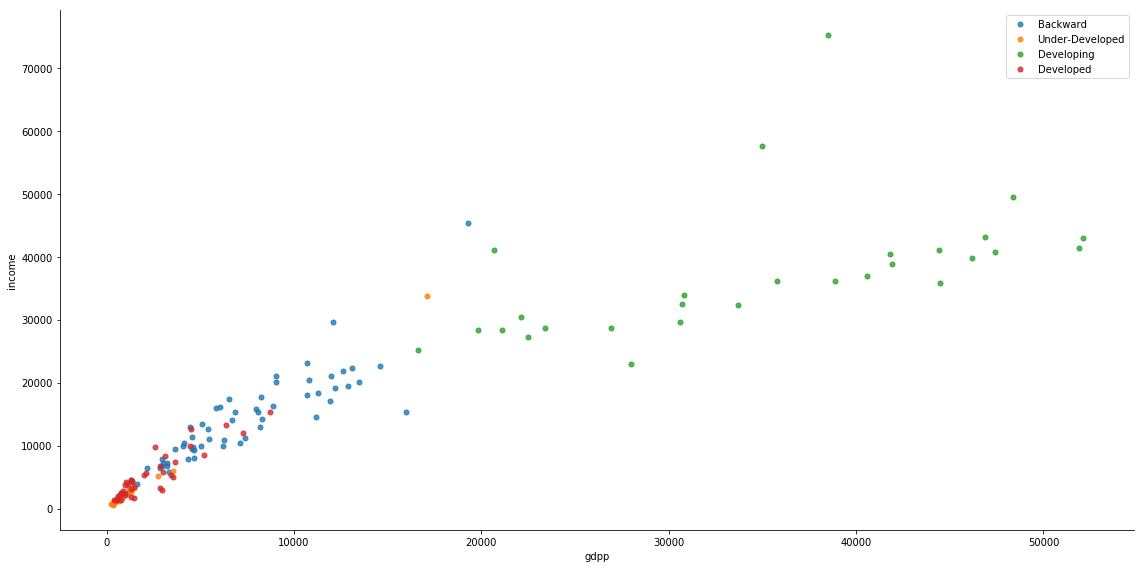

In [79]:
custom_scatter(df=countries_iqr_km4,x_var='gdpp',y_var='income',hue_var='Cluster',summary_df=summary_km4)

#### Scatter plot of Original Features: GDPP vs Child Mortality based on Clusters

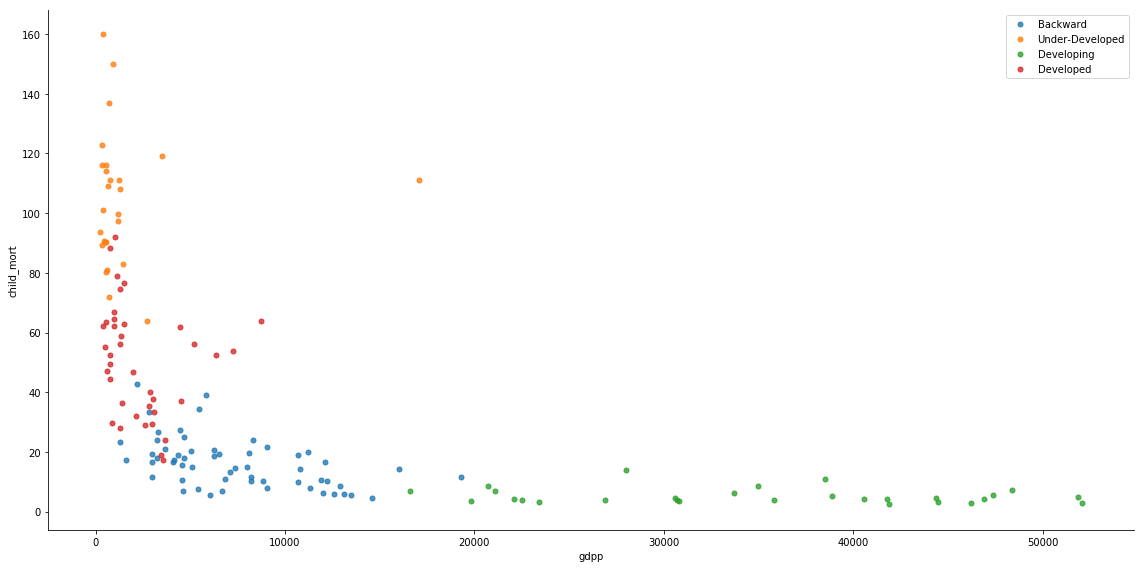

In [80]:
custom_scatter(df=countries_iqr_km4,x_var='gdpp',y_var='child_mort',hue_var='Cluster',summary_df=summary_km4)

#### Scatter plot of Original Features: GDPP vs Life Expectancy based on Clusters

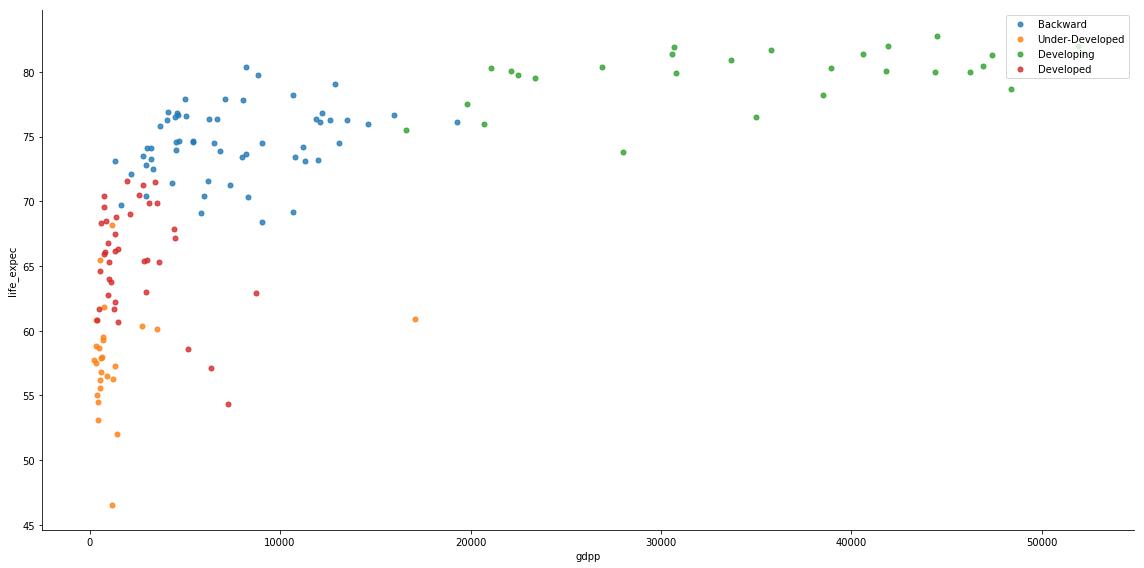

In [81]:
custom_scatter(df=countries_iqr_km4,x_var='gdpp',y_var='life_expec',hue_var='Cluster',summary_df=summary_km4)

#### Scatter plot of Principal Components : gdpp vs PC1 based on Clusters

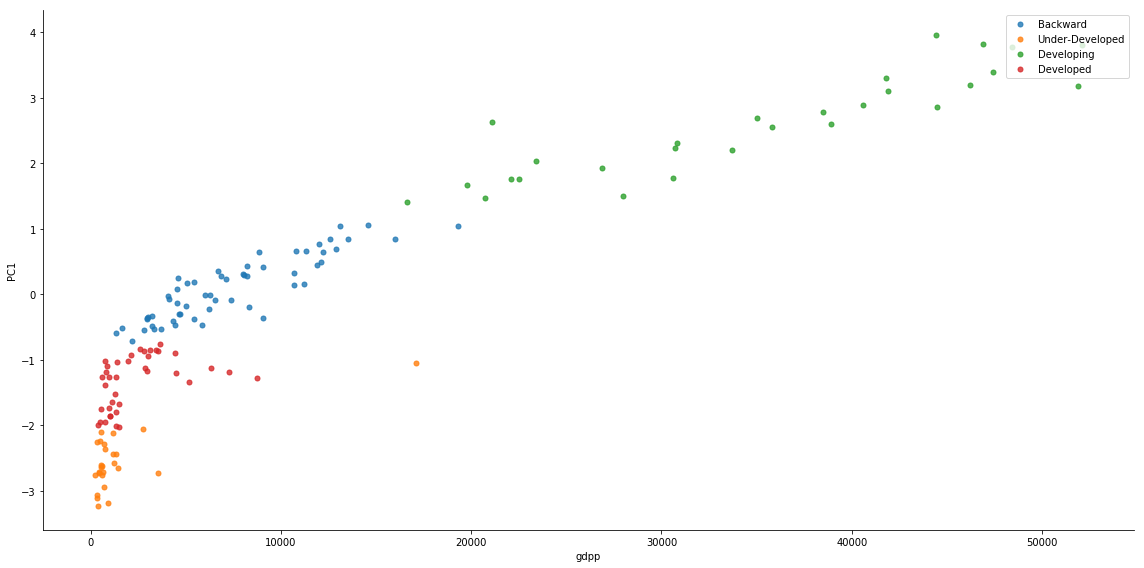

In [82]:
custom_scatter(df=countries_iqr_km4,x_var='gdpp',y_var='PC1',hue_var='Cluster',summary_df=summary_km4)

#### Scatter plot of Principal Components : child_mort vs PC2 based on Clusters

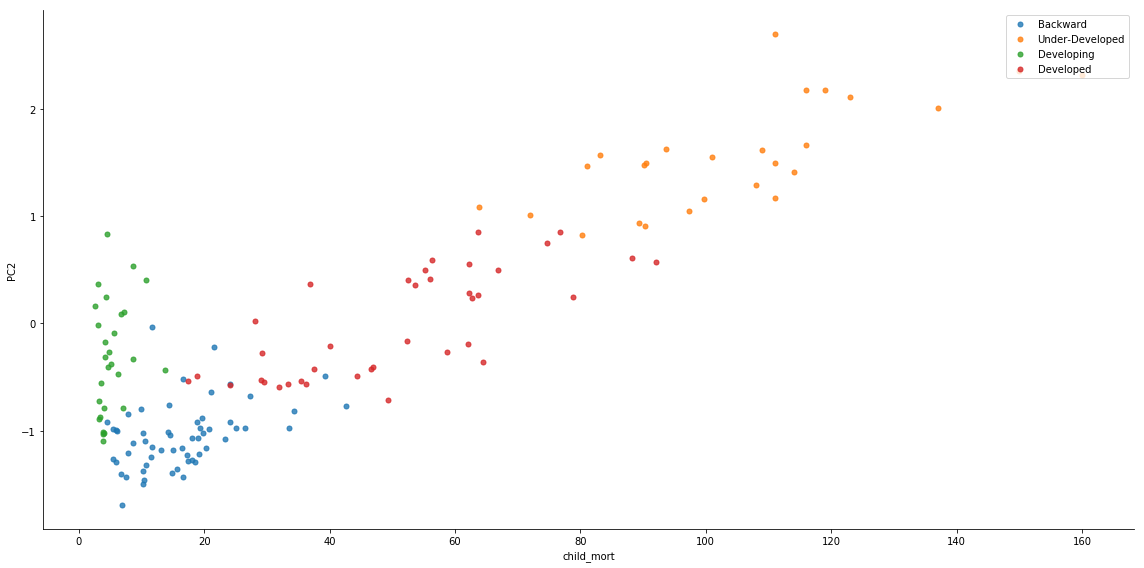

In [83]:
custom_scatter(df=countries_iqr_km4,x_var='child_mort',y_var='PC2',hue_var='Cluster',summary_df=summary_km4)

* GDPP and Income are linearly dependent.   
* As GDPP(Income) increases Child Mortality Decreases and Life Expectancy Increases.
* Backward countries are characterised by Low GDPP(Income), Low Life Expectancy and High Child Mortallity.   
* Developed countries are characterised by High GDPP(Income), High Life Expectancy and Low Child Mortallity.   
* The Under-Developed and Developing Countries are inter-sparced indicating that the major attributes like child-mortality , gdpp can have a significant impact in classification of the countries.

### Comparison of K=4 vs K=3

In [84]:
# Summary of K=3 Model
summary_km3

,Cluster,Count,Remark
0,2,44,Under-Developed
1,0,77,Developing
2,1,28,Developed


In [85]:
# Summary of K=4 Model
summary_km4

,Cluster,Count,Remark
0,1,26,Backward
1,3,38,Under-Developed
2,0,57,Developing
3,2,28,Developed


Backward countries are the countries which are in direst need of aid.

In [86]:
# List of Backward countries as obtained K=3 K-Mean Clustering
bkwd_countries_km3 = list(countries_iqr_km3[countries_iqr_km3.Cluster == summary_km3.iloc[0,0]].country)

# List of Backward countries as obtained K=4 K-Mean Clustering
bkwd_countries_km4 = list(countries_iqr_km4[countries_iqr_km4.Cluster == summary_km4.iloc[0,0]].country)

In [87]:
#Count of Backward Countries:
print("Number of Backward Countriues as per K=3 Clustering :",len(bkwd_countries_km3))
print("Number of Backward Countriues as per K=4 Clustering :",len(bkwd_countries_km4))

Number of Backward Countriues as per K=3 Clustering : 44
Number of Backward Countriues as per K=4 Clustering : 26


In [88]:
# Check if all the countries provided by km4 are present in km3
set(bkwd_countries_km4).issubset(set(bkwd_countries_km3))

True

### Since we have a reduced number of Backward countries in the K=4 K-Means Clustering, it give ths organization a smaller list of countries to concentrate the aid distribution. Hence we can settle with K=4 K-Means Clustering Model.

### Check Socio-Ecomonic and Health Factors of the countries identified for aid.

As seen earlier, the major factors influencing the backwardness of a country are :   
** 'gdpp', 'child_mort', 'income', 'life_expec', 'total_fer', 'inflation'**

Check these factors for a few countries.

In [89]:
# Average values for original features
display(pd.DataFrame(countries[num_vars].mean()).T.rename({0:'Mean'}))

,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp
Mean,38.27006,7420.622754,1056.754491,6588.401198,17144.688623,7.781832,70.555689,2.947964,12964.155689


In [90]:
import random 
for c in random.choices(bkwd_countries_km4,k=5):
    display(countries_iqr_km4[countries_iqr_km4.country == c]\
                       [['country','child_mort', 'income', 'life_expec', 'total_fer', 'gdpp']])

,country,child_mort,income,life_expec,total_fer,gdpp
90,Mali,137.0,1870,59.5,6.55,708


,country,child_mort,income,life_expec,total_fer,gdpp
92,Mauritania,97.4,3320,68.2,4.98,1200


,country,child_mort,income,life_expec,total_fer,gdpp
23,Burkina Faso,116.0,1430,57.9,5.87,575


,country,child_mort,income,life_expec,total_fer,gdpp
92,Mauritania,97.4,3320,68.2,4.98,1200


,country,child_mort,income,life_expec,total_fer,gdpp
119,Sierra Leone,160.0,1220,55.0,5.2,399


As can be seen, compared to the mean values,the selected countries have very high mortality rates,fertility rates and very low income,gdp. Also, the life expectancy is lower than the overall mean value.

### List of Countries identified as Backward Countries with direst need of aid.

In [91]:
print(bkwd_countries_km4)

['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Sierra Leone', 'Tanzania', 'Togo', 'Uganda', 'Zambia']


In [92]:
len(bkwd_countries_km4)

26

# Hierarchical Clustering

We will be using the dataframe ***'df_countries_pca_3_iqr'*** which has records lying within 1.5*Inter-Quartile Range. Also, this dataframe already has the Principal Components also included.

In [93]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [94]:
df_countries_pca_3_iqr.head(10)

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.635581,1.472248,-0.549494,90.2,55,42,248,1610,9.440,56.2,5.82,553
1,Albania,-0.024183,-1.429880,-0.014122,16.6,1145,268,1988,9930,4.490,76.3,1.65,4090
2,Algeria,-0.459561,-0.675499,0.959359,27.3,1713,186,1400,12900,16.100,76.5,2.89,4460
3,Angola,-2.722576,2.172339,0.600195,119.0,2199,101,1514,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,0.648668,-1.023399,-0.257439,10.3,5551,736,7186,19100,1.440,76.8,2.13,12200
5,Armenia,-0.334480,-1.271849,0.190555,18.1,670,142,1459,6700,7.770,73.3,1.69,3220
6,Australia,3.181538,-0.262488,-0.130892,4.8,10276,4531,10847,41400,1.160,82.0,1.93,51900
7,Austria,3.816849,0.248358,-0.258973,4.3,24060,5159,22418,43200,0.873,80.5,1.44,46900
8,Azerbaijan,-0.468076,-0.492718,0.609920,39.2,3171,343,1209,16000,13.800,69.1,1.92,5840
9,Bahamas,1.498917,-0.429651,-0.544536,13.8,9800,2209,12236,22900,-0.393,73.8,1.86,28000


In [95]:
df_countries_pca_3_iqr.shape

(149, 13)

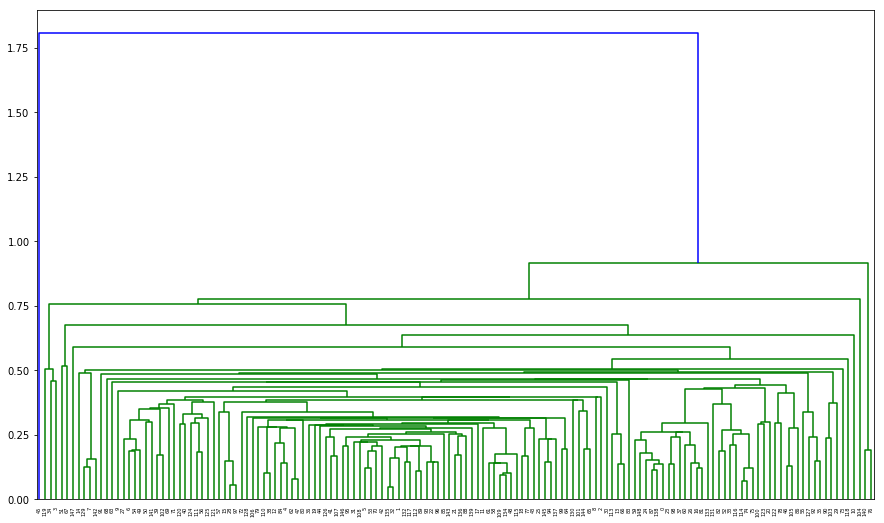

In [96]:
plt.figure(figsize=(15,9))
mergings_single = linkage(df_countries_pca_3_iqr[pc_vars], \
                             method = "single", metric='euclidean',optimal_ordering=True)
dendrogram(mergings_single)

plt.show()

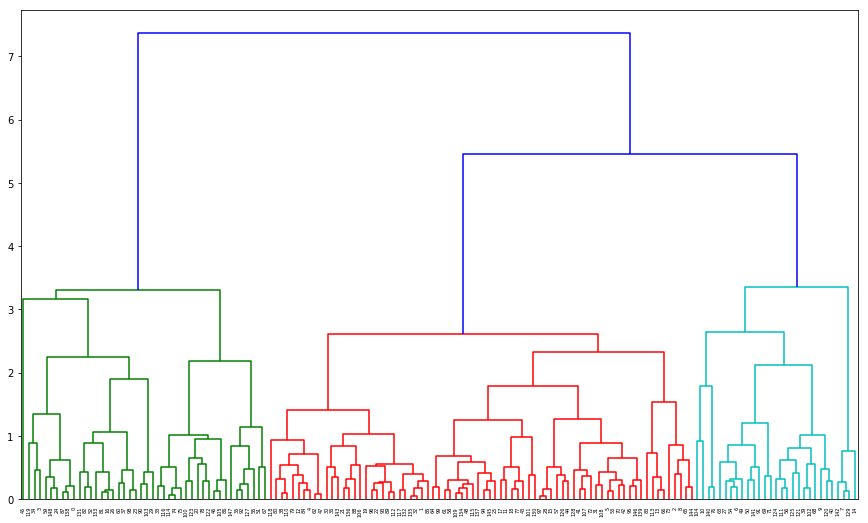

In [97]:
plt.figure(figsize=(15,9))
mergings_complete = linkage(df_countries_pca_3_iqr[pc_vars], \
                             method = "complete", metric='euclidean',optimal_ordering=True)
dendrogram(mergings_complete)

plt.show()

**The dendogram generated using method='single' does not provide good cluster mergings, where as the mergings provided by mothod='complete' are far better. Hence we will use 'complete' method mergings for further analysis.**

Intuitively it looks like we could create 3 clusters of the data, but that would provide us with very few clusters to base our decisions on i.e.,we may get a huge list of countries that may seem in to be in direst of need.

Let's try to create 3 and 4 clusters, then decide the optimum number of clusters.

## Hierarchical with n_clusters=3

In [98]:
clusterCut3 = pd.Series(cut_tree(mergings_complete, n_clusters=3).reshape(-1,))
countries_iqr_hc3 = pd.concat([df_countries_pca_3_iqr, clusterCut3], axis=1)

countries_iqr_hc3.rename(columns={0:'Cluster'}, inplace=True)
countries_iqr_hc3.head(10)

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,-2.635581,1.472248,-0.549494,90.2,55,42,248,1610,9.440,56.2,5.82,553,0
1,Albania,-0.024183,-1.429880,-0.014122,16.6,1145,268,1988,9930,4.490,76.3,1.65,4090,1
2,Algeria,-0.459561,-0.675499,0.959359,27.3,1713,186,1400,12900,16.100,76.5,2.89,4460,1
3,Angola,-2.722576,2.172339,0.600195,119.0,2199,101,1514,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,0.648668,-1.023399,-0.257439,10.3,5551,736,7186,19100,1.440,76.8,2.13,12200,1
5,Armenia,-0.334480,-1.271849,0.190555,18.1,670,142,1459,6700,7.770,73.3,1.69,3220,1
6,Australia,3.181538,-0.262488,-0.130892,4.8,10276,4531,10847,41400,1.160,82.0,1.93,51900,2
7,Austria,3.816849,0.248358,-0.258973,4.3,24060,5159,22418,43200,0.873,80.5,1.44,46900,2
8,Azerbaijan,-0.468076,-0.492718,0.609920,39.2,3171,343,1209,16000,13.800,69.1,1.92,5840,1
9,Bahamas,1.498917,-0.429651,-0.544536,13.8,9800,2209,12236,22900,-0.393,73.8,1.86,28000,2


In [99]:
countries_iqr_hc3.shape

(149, 14)

In [100]:
countries_iqr_hc3.Cluster.value_counts()

1    76
0    44
2    29
Name: Cluster, dtype: int64

In [101]:
for col in num_vars:
    print("Feature : {}".format(col))
    display(countries_iqr_hc3.groupby('Cluster')[col].agg(['min','mean','max']).T\
            .rename(columns={0:'PC1',1:'PC2',2:'PC3'}))

Feature : child_mort


Cluster,PC1,PC2,PC3
min,28.100000,4.500000,2.600000
mean,87.447727,22.417105,5.513793
max,160.000000,64.400000,13.800000


Feature : exportsp


Cluster,PC1,PC2,PC3
min,21.00,1.000000,5945.000000
mean,940.25,2616.789474,15110.724138
max,14672.00,10965.000000,33922.000000


Feature : healthp


Cluster,PC1,PC2,PC3
min,13.000000,19.000000,535.000000
mean,113.681818,383.486842,3207.413793
max,766.000000,1275.000000,8664.000000


Feature : importsp


Cluster,PC1,PC2,PC3
min,91.000000,1.000000,6052.000000
mean,857.909091,2858.460526,14126.965517
max,10072.000000,11664.000000,33167.000000


Feature : income


Cluster,PC1,PC2,PC3
min,609.000000,1990.000000,22900.000000
mean,4038.295455,11405.526316,37586.206897
max,33700.000000,29600.000000,75200.000000


Feature : inflation


Cluster,PC1,PC2,PC3
min,0.885000,-4.21000,-1.900000
mean,9.858523,6.19025,2.655276
max,24.900000,19.50000,15.600000


Feature : life_expec


Cluster,PC1,PC2,PC3
min,46.500,63.000000,73.800000
mean,59.825,72.867105,79.658621
max,68.200,80.400000,82.800000


Feature : total_fer


Cluster,PC1,PC2,PC3
min,2.5900,1.250000,1.230000
mean,4.9775,2.265658,1.792759
max,7.4900,4.340000,3.030000


Feature : gdpp


Cluster,PC1,PC2,PC3
min,231.000000,592.000000,16600.0
mean,1922.818182,5890.947368,34500.0
max,17100.000000,16000.000000,52100.0


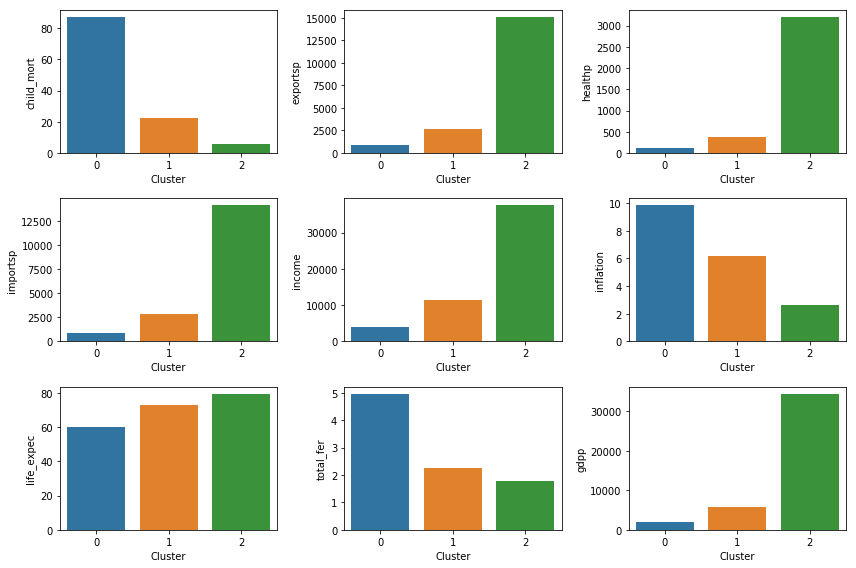

In [102]:
# Bar-plot cluster vs each of the original features
custom_plot(df=countries_iqr_hc3,var_list=num_vars,plot_type='bar')

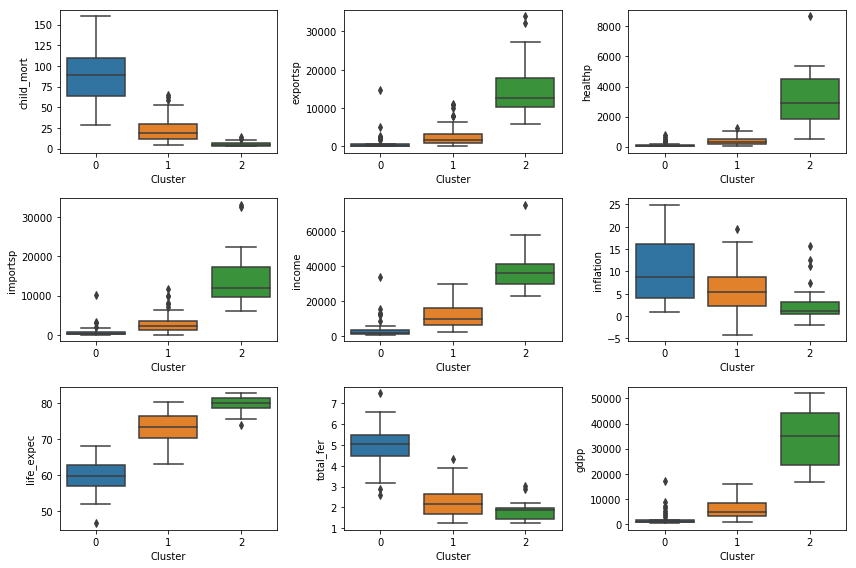

In [103]:
# Box-plot cluster vs each of the features
custom_plot(df=countries_iqr_hc3,var_list=num_vars,plot_type='box')

Highly influential factors in classification of the countries are :      
**Child Mortality Rate, Income Level, Life Expectancy, Total Fertality and GDPP.**

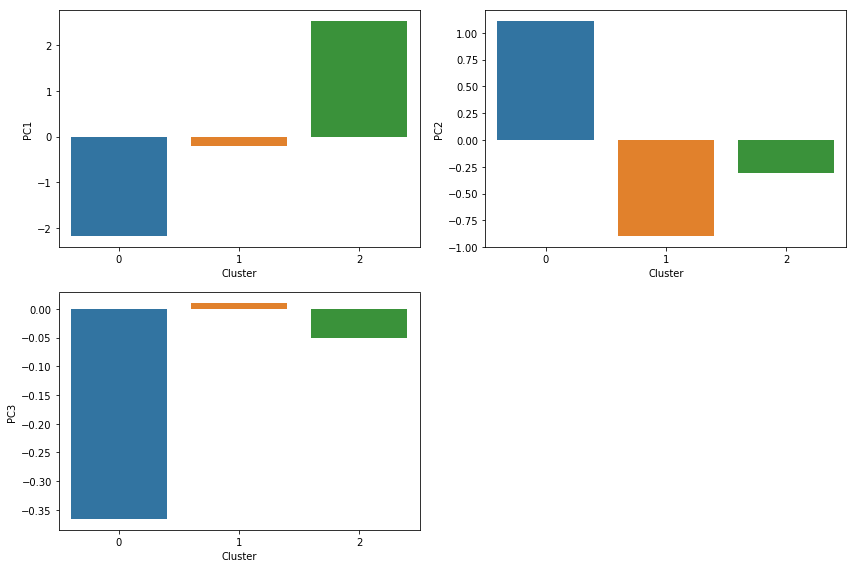

In [104]:
# Bar-plot cluster vs each of the principal components
custom_plot(df=countries_iqr_hc3,var_list=pc_vars,plot_type='bar')

In [105]:
summary_hc3 = countries_iqr_hc3.groupby('Cluster')['gdpp'].\
agg({'Mean':'mean','Count' : 'count'}).\
sort_values(by='Mean').reset_index().\
drop('Mean',axis=1)

summary_hc3['Remark'] = pd.Series(['Under-Developed','Developing','Developed'])
summary_hc3

,Cluster,Count,Remark
0,0,44,Under-Developed
1,1,76,Developing
2,2,29,Developed


#### Scatter plot of Principal Components : PC1 vs PC2 based on Clusters

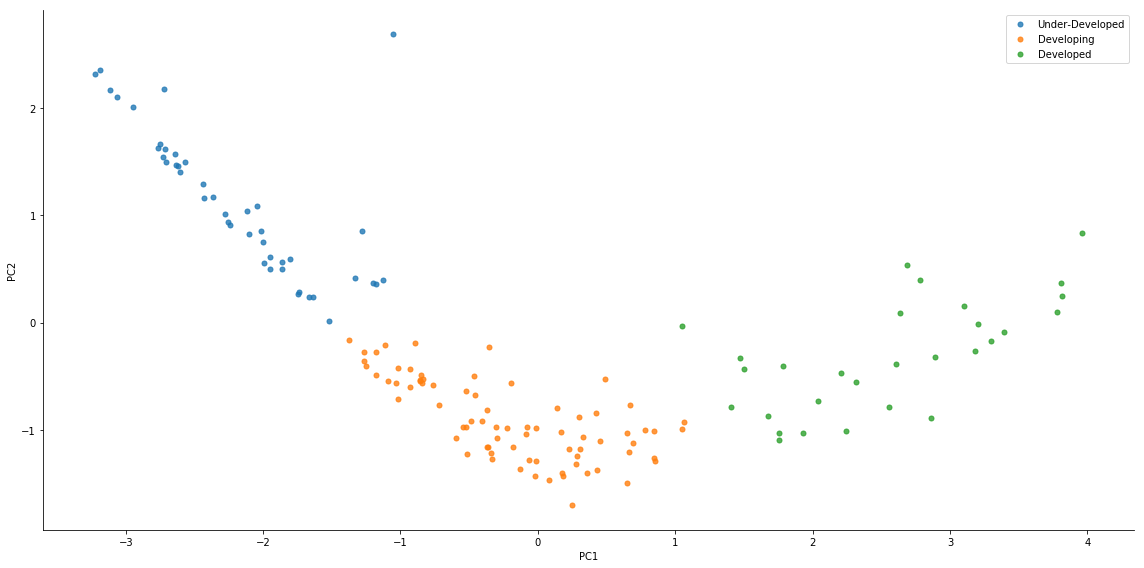

In [106]:
custom_scatter(df=countries_iqr_hc3,x_var='PC1',y_var='PC2',hue_var='Cluster',summary_df=summary_hc3)

#### Scatter plot of Original Features: GDPP vs Income based on Clusters

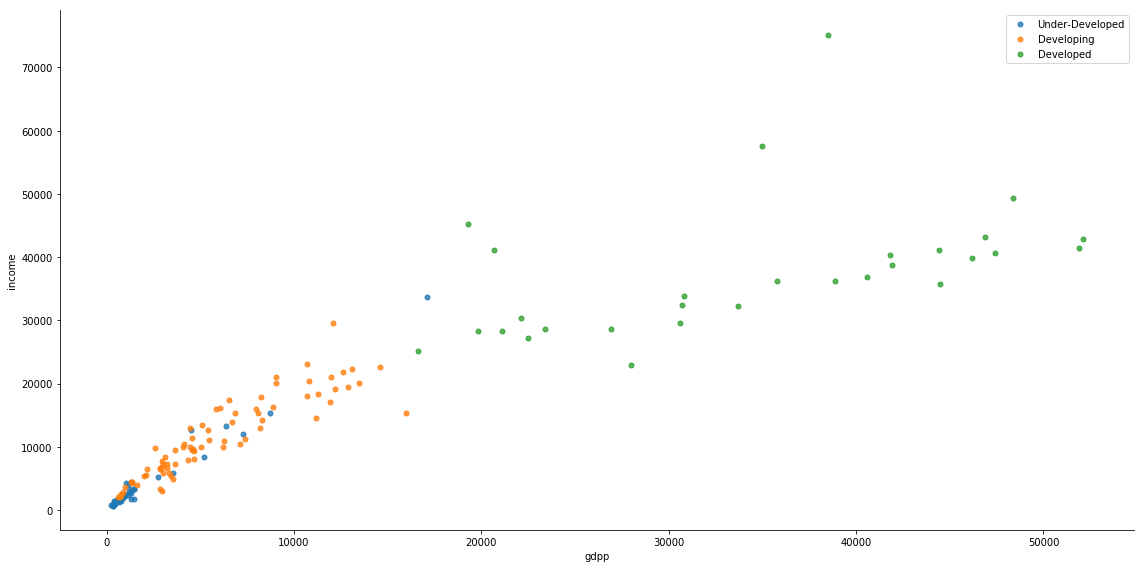

In [107]:
custom_scatter(df=countries_iqr_hc3,x_var='gdpp',y_var='income',hue_var='Cluster',summary_df=summary_hc3)

#### Scatter plot of Original Features: GDPP vs Child Mortality based on Clusters

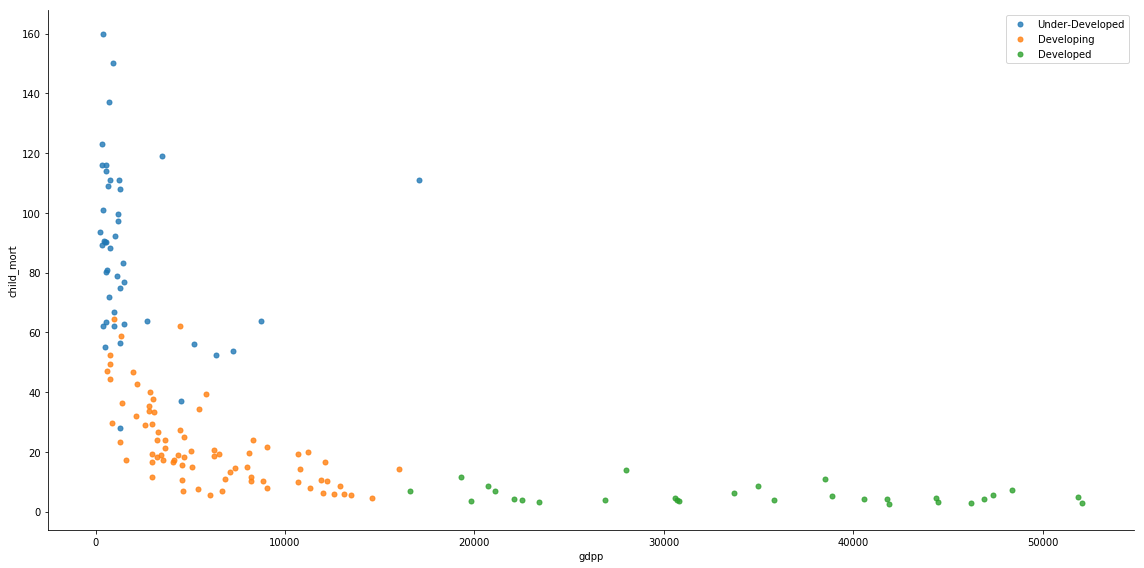

In [108]:
custom_scatter(df=countries_iqr_hc3,x_var='gdpp',y_var='child_mort',hue_var='Cluster',summary_df=summary_hc3)

#### Scatter plot of Original Features: GDPP vs Life Expectancy based on Clusters

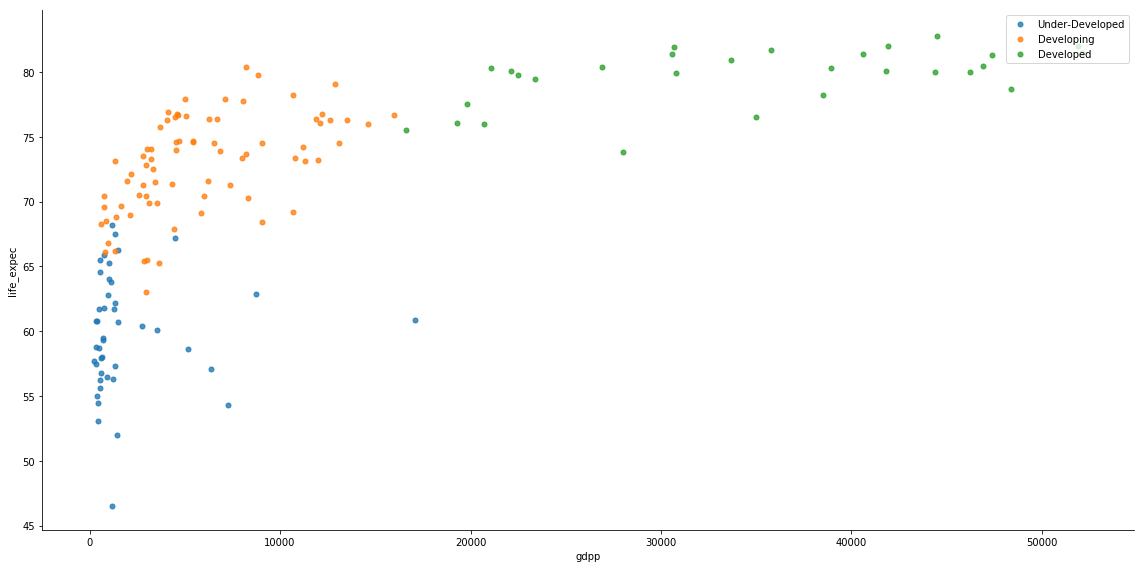

In [109]:
custom_scatter(df=countries_iqr_hc3,x_var='gdpp',y_var='life_expec',hue_var='Cluster',summary_df=summary_hc3)

#### Scatter plot of Principal Components : gdpp vs PC1 based on Clusters

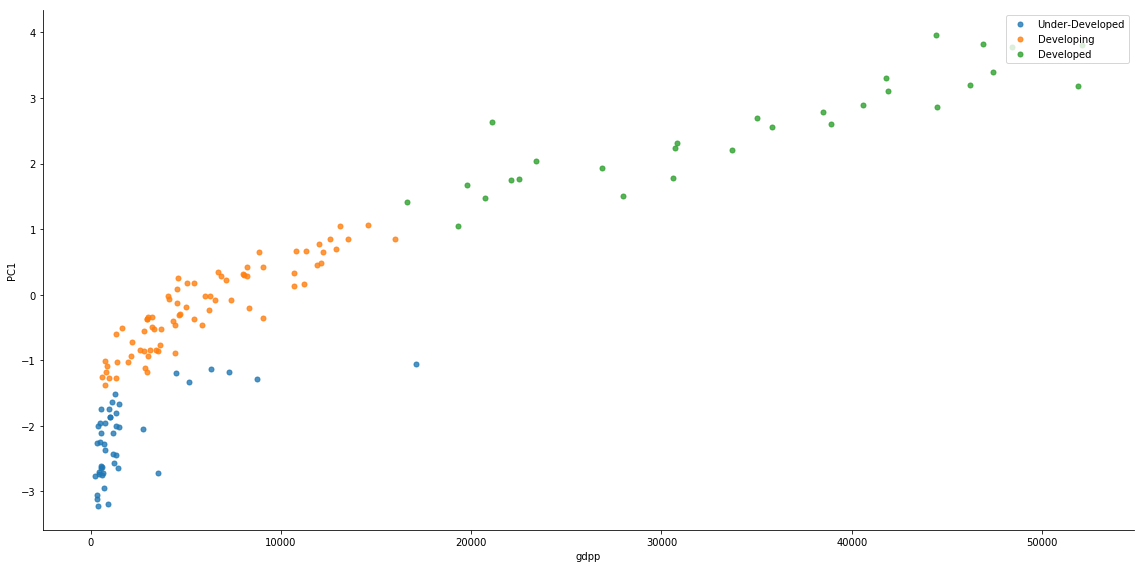

In [110]:
custom_scatter(df=countries_iqr_hc3,x_var='gdpp',y_var='PC1',hue_var='Cluster',summary_df=summary_hc3)

#### Scatter plot of Principal Components : child_mort vs PC2 based on Clusters

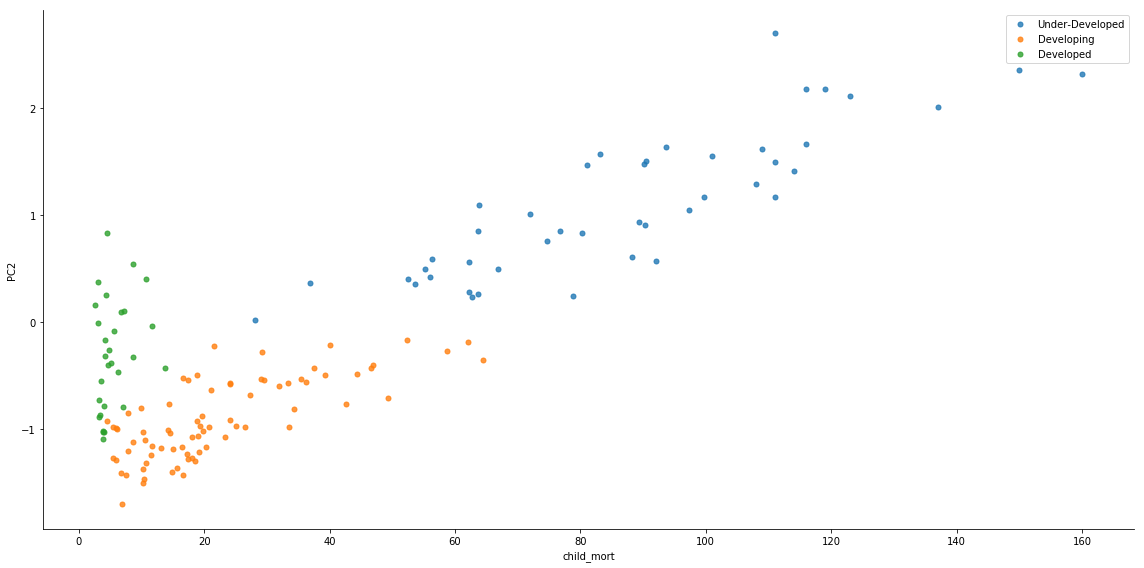

In [111]:
custom_scatter(df=countries_iqr_hc3,x_var='child_mort',y_var='PC2',hue_var='Cluster',summary_df=summary_hc3)

* GDPP and Income are linearly dependent.   
* As GDPP(Income) increases Child Mortality Decreases and Life Expectancy Increases.
* Under-Develoeped countries are characterised by Low GDPP(Income), Low Life Expectancy and High Child Mortallity.   
* Developed countries are characterised by High GDPP(Income), High Life Expectancy and Low Child Mortallity.   

## Hierarchical with n_clusters=4

In [112]:
clusterCut4 = pd.Series(cut_tree(mergings_complete, n_clusters=4).reshape(-1,))
countries_iqr_hc4 = pd.concat([df_countries_pca_3_iqr, clusterCut4], axis=1)

countries_iqr_hc4.rename(columns={0:'Cluster'}, inplace=True)
countries_iqr_hc4.head(10)

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,-2.635581,1.472248,-0.549494,90.2,55,42,248,1610,9.440,56.2,5.82,553,0
1,Albania,-0.024183,-1.429880,-0.014122,16.6,1145,268,1988,9930,4.490,76.3,1.65,4090,1
2,Algeria,-0.459561,-0.675499,0.959359,27.3,1713,186,1400,12900,16.100,76.5,2.89,4460,1
3,Angola,-2.722576,2.172339,0.600195,119.0,2199,101,1514,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,0.648668,-1.023399,-0.257439,10.3,5551,736,7186,19100,1.440,76.8,2.13,12200,1
5,Armenia,-0.334480,-1.271849,0.190555,18.1,670,142,1459,6700,7.770,73.3,1.69,3220,1
6,Australia,3.181538,-0.262488,-0.130892,4.8,10276,4531,10847,41400,1.160,82.0,1.93,51900,2
7,Austria,3.816849,0.248358,-0.258973,4.3,24060,5159,22418,43200,0.873,80.5,1.44,46900,3
8,Azerbaijan,-0.468076,-0.492718,0.609920,39.2,3171,343,1209,16000,13.800,69.1,1.92,5840,1
9,Bahamas,1.498917,-0.429651,-0.544536,13.8,9800,2209,12236,22900,-0.393,73.8,1.86,28000,2


In [113]:
countries_iqr_hc4.shape

(149, 14)

In [114]:
countries_iqr_hc4.Cluster.value_counts()

1    76
0    44
2    25
3     4
Name: Cluster, dtype: int64

In [115]:
for col in num_vars:
    print("Feature : {}".format(col))
    display(countries_iqr_hc4.groupby('Cluster')[col].agg(['min','mean','max']).T\
            .rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4'}))

Feature : child_mort


Cluster,PC1,PC2,PC3,PC4
min,28.100000,4.500000,2.600,3.000
mean,87.447727,22.417105,5.632,4.775
max,160.000000,64.400000,13.800,7.300


Feature : exportsp


Cluster,PC1,PC2,PC3,PC4
min,21.00,1.000000,5945.00,6002.0
mean,940.25,2616.789474,14006.28,22013.5
max,14672.00,10965.000000,32283.00,33922.0


Feature : healthp


Cluster,PC1,PC2,PC3,PC4
min,13.000000,19.000000,535.00,4751.00
mean,113.681818,383.486842,2776.96,5897.75
max,766.000000,1275.000000,5356.00,8664.00


Feature : importsp


Cluster,PC1,PC2,PC3,PC4
min,91.000000,1.000000,6052.0,7647.00
mean,857.909091,2858.460526,13009.8,21109.25
max,10072.000000,11664.000000,32494.0,33167.00


Feature : income


Cluster,PC1,PC2,PC3,PC4
min,609.000000,1990.000000,22900.0,41100.0
mean,4038.295455,11405.526316,36536.0,44150.0
max,33700.000000,29600.000000,75200.0,49400.0


Feature : inflation


Cluster,PC1,PC2,PC3,PC4
min,0.885000,-4.21000,-1.90000,0.873
mean,9.858523,6.19025,2.88156,1.241
max,24.900000,19.50000,15.60000,1.880


Feature : life_expec


Cluster,PC1,PC2,PC3,PC4
min,46.500,63.000000,73.800,78.700
mean,59.825,72.867105,79.576,80.175
max,68.200,80.400000,82.800,81.500


Feature : total_fer


Cluster,PC1,PC2,PC3,PC4
min,2.5900,1.250000,1.2300,1.4400
mean,4.9775,2.265658,1.7912,1.8025
max,7.4900,4.340000,3.0300,1.9800


Feature : gdpp


Cluster,PC1,PC2,PC3,PC4
min,231.000000,592.000000,16600.0,44400.0
mean,1922.818182,5890.947368,32348.0,47950.0
max,17100.000000,16000.000000,51900.0,52100.0


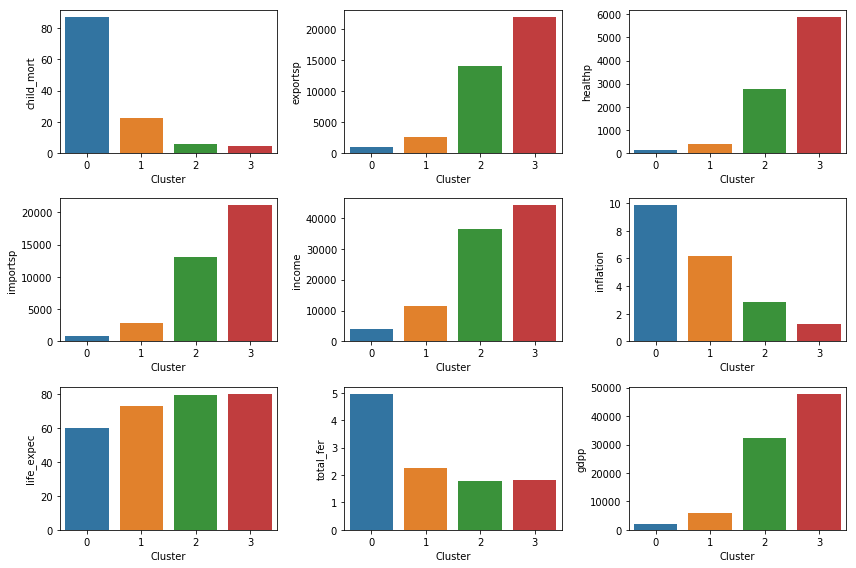

In [116]:
# Bar-plot cluster vs each of the Original Features
custom_plot(df=countries_iqr_hc4,var_list=num_vars,plot_type='bar')

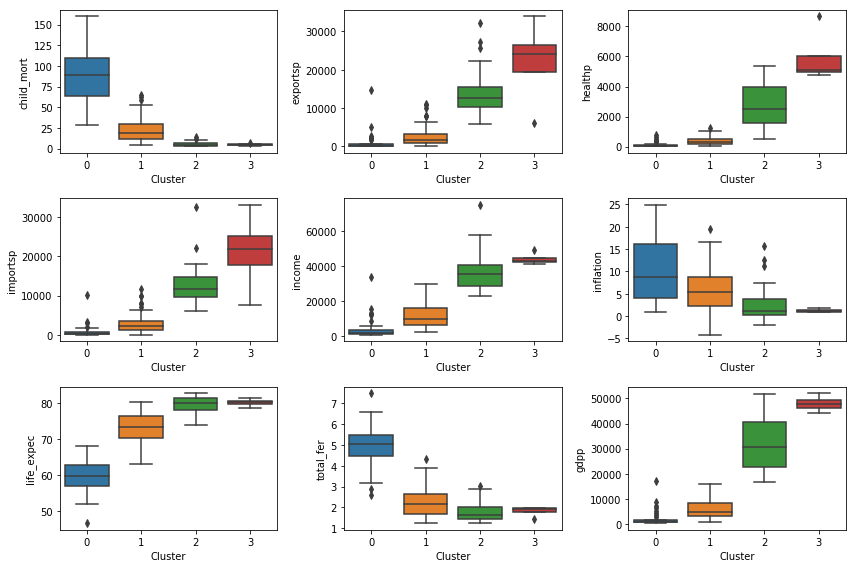

In [117]:
# Box-plot cluster vs each of the features
custom_plot(df=countries_iqr_hc4,var_list=num_vars,plot_type='box')

Highly influential factors in classification of the countries are :   
**Child Mortality Rate, Income Level, Life Expectancy, Total Fertality and GDPP.**

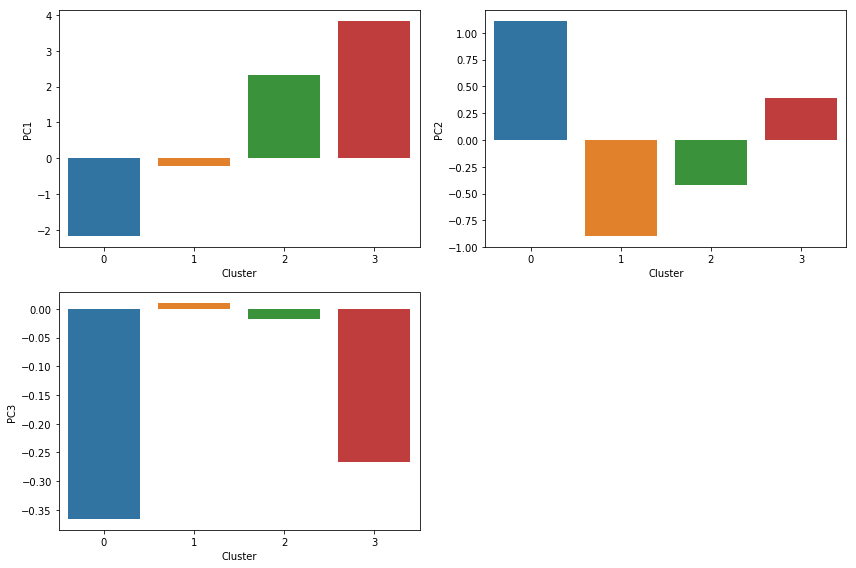

In [118]:
# Bar-plot cluster vs each of the Principal Components
custom_plot(df=countries_iqr_hc4,var_list=pc_vars,plot_type='bar')

In [119]:
summary_hc4 = countries_iqr_hc4.groupby('Cluster')['gdpp'].\
agg({'Mean':'mean','Count' : 'count'}).\
sort_values(by='Mean').reset_index().\
drop('Mean',axis=1)

summary_hc4['Remark'] = pd.Series(['Backward','Under-Developed','Developing','Developed'])
summary_hc4

,Cluster,Count,Remark
0,0,44,Backward
1,1,76,Under-Developed
2,2,25,Developing
3,3,4,Developed


#### Scatter plot of Principal Components : PC1 vs PC2 based on Clusters

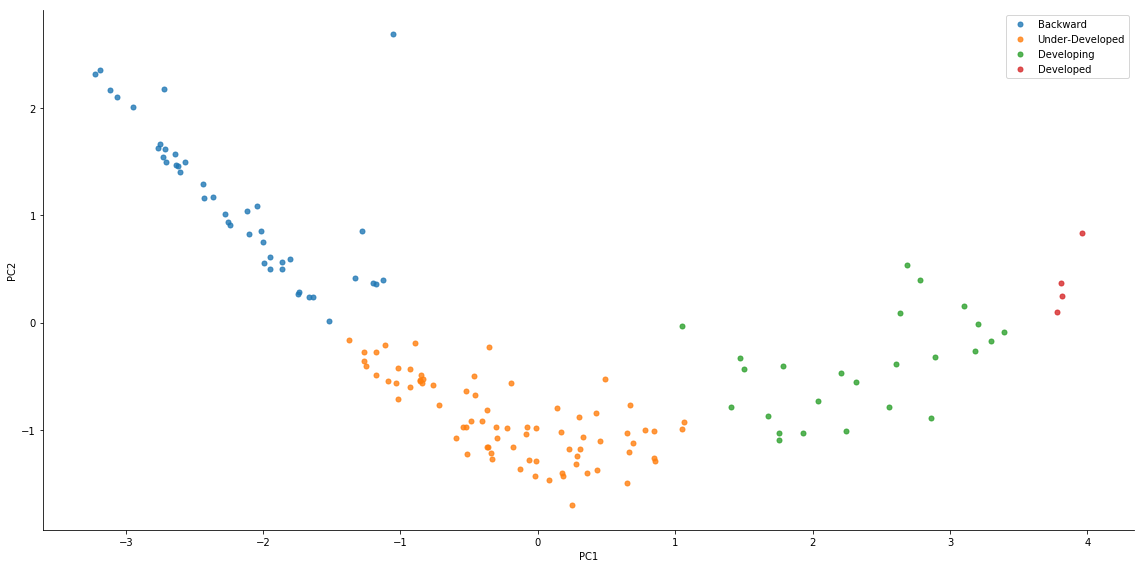

In [120]:
custom_scatter(df=countries_iqr_hc4,x_var='PC1',y_var='PC2',hue_var='Cluster',summary_df=summary_hc4)

#### Scatter plot of Original Features: GDPP vs Income based on Clusters

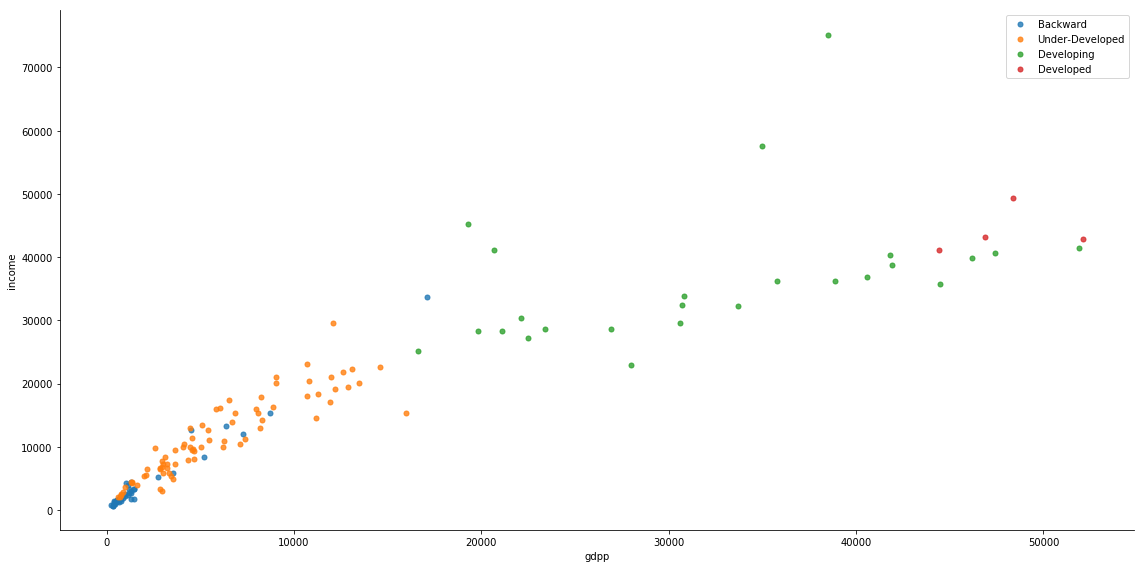

In [121]:
custom_scatter(df=countries_iqr_hc4,x_var='gdpp',y_var='income',hue_var='Cluster',summary_df=summary_hc4)

#### Scatter plot of Original Features: GDPP vs Child Mortality based on Clusters

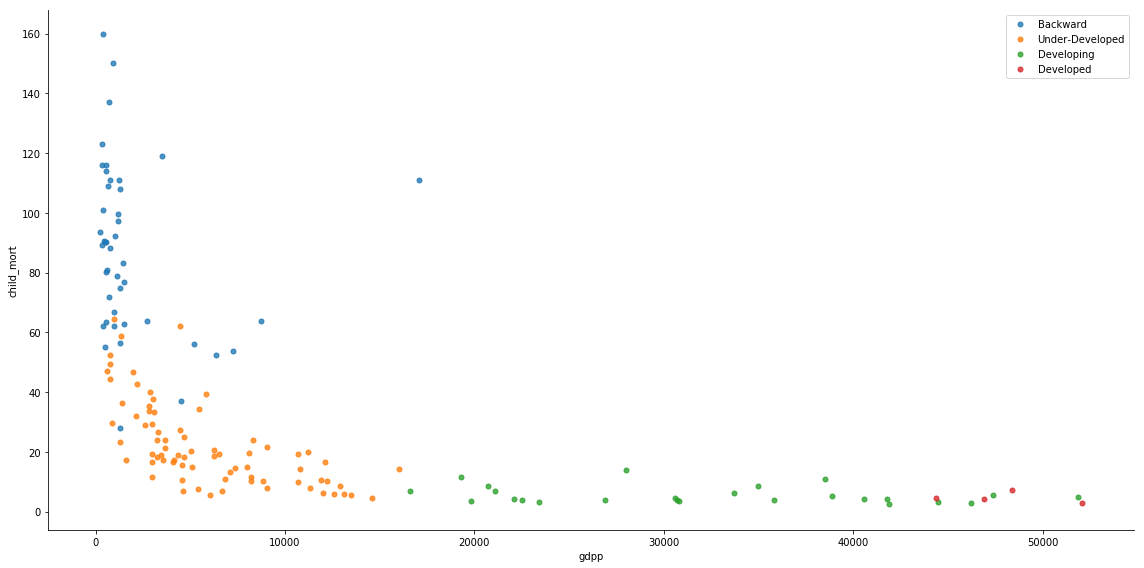

In [122]:
custom_scatter(df=countries_iqr_hc4,x_var='gdpp',y_var='child_mort',hue_var='Cluster',summary_df=summary_hc4)

#### Scatter plot of Original Features: GDPP vs Life Expectancy based on Clusters

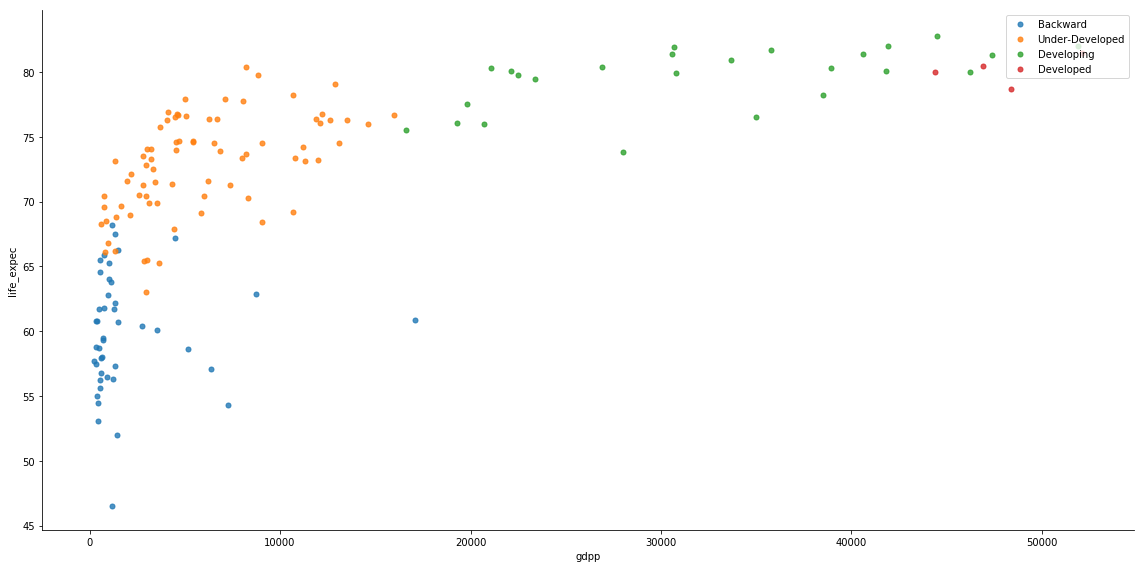

In [123]:
custom_scatter(df=countries_iqr_hc4,x_var='gdpp',y_var='life_expec',hue_var='Cluster',summary_df=summary_hc4)

#### Scatter plot of Principal Components : gdpp vs PC1 based on Clusters

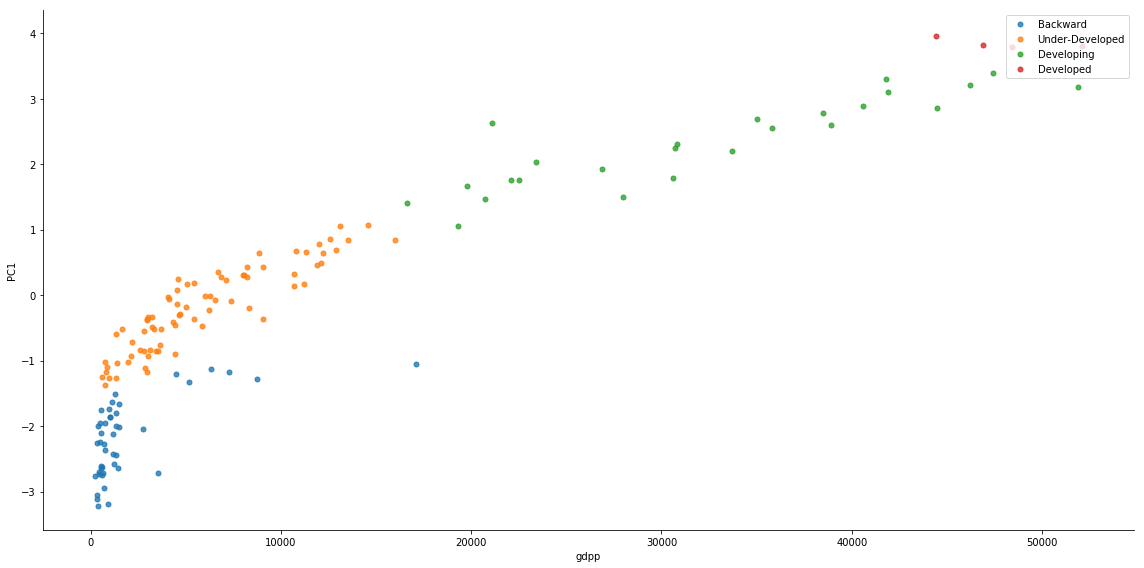

In [124]:
custom_scatter(df=countries_iqr_hc4,x_var='gdpp',y_var='PC1',hue_var='Cluster',summary_df=summary_hc4)

#### Scatter plot of Principal Components : child_mort vs PC2 based on Clusters

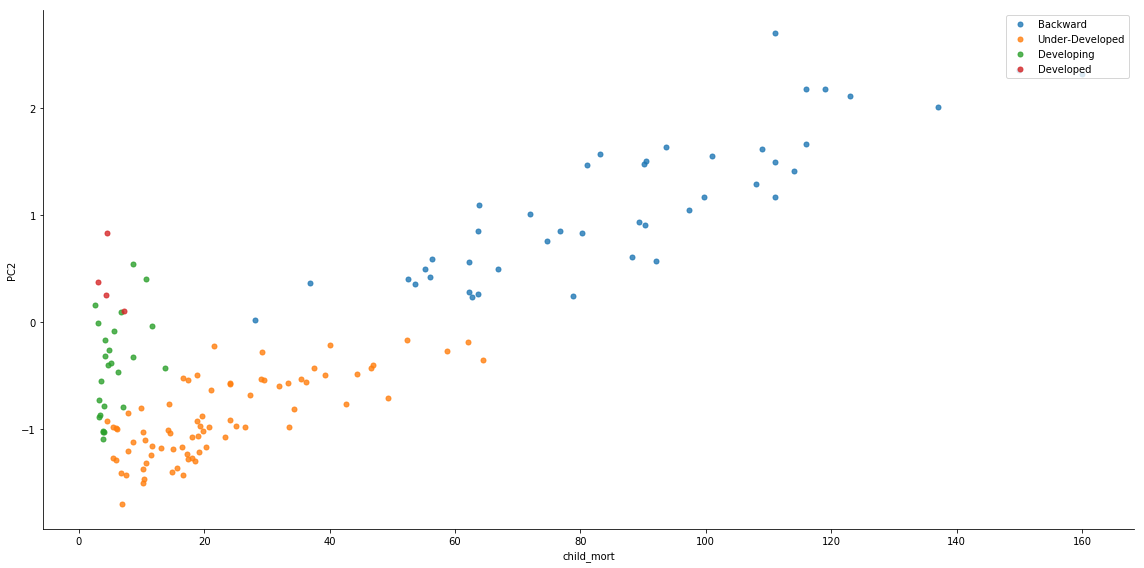

In [125]:
custom_scatter(df=countries_iqr_hc4,x_var='child_mort',y_var='PC2',hue_var='Cluster',summary_df=summary_hc4)

* GDPP and Income are linearly dependent.   
* As GDPP(Income) increases Child Mortality Decreases and Life Expectancy Increases.
* Backward countries are characterised by Low GDPP(Income), Low Life Expectancy and High Child Mortallity.   
* Developed countries are characterised by High GDPP(Income), High Life Expectancy and Low Child Mortallity.   
* The Under-Developed and Developing Countries are inter-sparced indicating that the major attributes like child-mortality , gdpp can have a significant impact in classification of the countries.

However, the clusters are highly imbalanced with 76 Countries categorised as 'Under-Developed Countries' and only 4 countries categorized as 'Developed'.

### Comparison of K=4 vs K=3

In [126]:
# Summary of Hierarchical K=4 Model
summary_hc4

,Cluster,Count,Remark
0,0,44,Backward
1,1,76,Under-Developed
2,2,25,Developing
3,3,4,Developed


In [127]:
# Summary of Hierarchical K=5 Model
summary_hc3

,Cluster,Count,Remark
0,0,44,Under-Developed
1,1,76,Developing
2,2,29,Developed


Backward countries are the countries which are in direst need of aid.

In [128]:
# List of Backward countries as obtained for 3 Clusters
bkwd_countries_hc3 = list(countries_iqr_hc3[countries_iqr_hc3.Cluster == summary_hc3.iloc[0,0]].country)

# List of Backward countries as obtained for 4 Clusters
bkwd_countries_hc4 = list(countries_iqr_hc4[countries_iqr_hc4.Cluster == summary_hc4.iloc[0,0]].country)

In [129]:
#Count of Backward Countries:
print("Number of Backward Countriues as per 3 Clusters :",len(bkwd_countries_hc3))
print("Number of Backward Countriues as per 4 Clusters :",len(bkwd_countries_hc4))

Number of Backward Countriues as per 3 Clusters : 44
Number of Backward Countriues as per 4 Clusters : 44


In [130]:
# Check if all the countries provided by km5 are present in km4
set(bkwd_countries_hc3).issubset(set(bkwd_countries_hc4))

True

### With increase in clusters from 3 to 4, the number of countries in the Backward category remain the same. 

Since the model with 4 clusters provides a better spread of countries into various clusters, we can go ahead with Cluster 5.

### Check Socio-Ecomonic and Health Factors of the countries identified for aid.

As seen earlier, the major factors influencing the backwardness of a country are :   
**'child_mort', 'income', 'life_expec', 'total_fer', 'gdpp', 'inflation'**

Check these factors for a few countries.

In [131]:
# Average values for these features
display(pd.DataFrame(countries[num_vars].mean()).T.rename({0:'Mean'}))

,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp
Mean,38.27006,7420.622754,1056.754491,6588.401198,17144.688623,7.781832,70.555689,2.947964,12964.155689


In [132]:
import random 
for c in random.choices(bkwd_countries_hc4,k=5):
    display(countries_iqr_hc4[countries_iqr_hc4.country == c])

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
20,Botswana,-1.129487,0.401621,-0.231994,52.5,2769,527,3258,13300,8.92,57.1,2.88,6350,0


,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
35,"Congo, Rep.",-2.047423,1.089143,0.717292,63.9,2332,67,1499,5190,20.7,60.4,4.95,2740,0


,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
26,Cameroon,-2.438962,1.288262,-1.2261,108.0,291,67,354,2660,1.91,57.3,5.11,1310,0


,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
26,Cameroon,-2.438962,1.288262,-1.2261,108.0,291,67,354,2660,1.91,57.3,5.11,1310,0


,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
100,Namibia,-1.334629,0.417998,-0.760212,56.0,2481,352,3150,8460,3.56,58.6,3.6,5190,0


As can be seen, compared to the mean values,the selected countries have very high mortality rates,fertility rates and very low income,gdp. Also, the life expectancy is lower than the overall mean value.

### List of Countries identified as Backward Countries with direst need of aid.

In [133]:
print(bkwd_countries_hc4)

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Yemen', 'Zambia']


In [134]:
len(bkwd_countries_hc4)

44

### Choosing between K-Means Clustering and Hierarchical Clustering

** We had identified the following models to be better in eachof the clustering process:
* K-Means Clustering with 4 Clusters 
* Hierarchical Clustering  with 4 Clusters 

Let us compare these models to arrive at the final model.

**Clustering of K-Means Clustering for 4 clusters:**

In [135]:
summary_km4

,Cluster,Count,Remark
0,1,26,Backward
1,3,38,Under-Developed
2,0,57,Developing
3,2,28,Developed


**Clustering of Hierarchical Clustering for 4 clusters:**

In [136]:
summary_hc4

,Cluster,Count,Remark
0,0,44,Backward
1,1,76,Under-Developed
2,2,25,Developing
3,3,4,Developed


### Difference in Countries categorised as direst in need of aid(Backward Countries).

In [137]:
# Check whether all the countries part of K-Means model are also present in Hierarchical Model for Backward Countries
set(bkwd_countries_km4).issubset(set(bkwd_countries_hc4))

True

In [138]:
#### Countries Present in K-Means but not in Hierarchical
set(bkwd_countries_km4) - set(bkwd_countries_hc4)

set()

In [139]:
#### Countries Present in Hierarchical but not in K-Means
set(bkwd_countries_hc4) - set(bkwd_countries_km4)

{'Botswana',
 'Comoros',
 'Eritrea',
 'Gabon',
 'Ghana',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Madagascar',
 'Namibia',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Yemen'}

In [140]:
#### Countries Present in both K-Means and Hierarchical
set(bkwd_countries_hc4) | set(bkwd_countries_km4)

{'Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia'}

All the countries identified as **'Backward'** in K-Means are also present in the same category in Hierarchical Model.

However, in K-Means Clustering the countries are spread more evenly where as in Hierarchical Model the spread of countries is uneven(only 4 Developed Countries, 44 Backward Countries,76 Under-Developed Countries).

Hence, we finalise on the **_K-Means Clustering Model with K=4 Clusters_**.

## Outlier Analysis and possible clustering

There were a few countries which were not part of the clustering process as they were flagged off as 'Outliers'.   
Let's analyse these countries and try to fit them to an appropriate cluster

In [141]:
# Dataframe with Outlier Data
df_countries_pca_3_outl

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp
0,Argentina,0.035364,-0.685274,1.468710,14.5,1947,834,1648,18700,20.900,75.8,2.37,10300
1,Brunei,2.697167,0.358616,1.560527,10.5,23792,1003,9884,80600,16.700,77.1,1.84,35300
2,Central African Republic,-3.236904,2.178425,-1.602988,149.0,53,18,118,888,2.010,47.5,5.21,446
3,Denmark,4.377894,0.909098,-0.163335,4.1,29290,6612,25288,44000,3.220,79.5,1.87,58000
4,Haiti,-3.937262,3.036988,-1.756350,208.0,101,46,428,1500,5.450,32.1,3.33,662
5,Ireland,4.662243,1.405646,-0.753338,4.2,50161,4476,42126,45700,-3.220,80.4,2.05,48700
6,Luxembourg,12.647932,8.276697,-0.619714,2.8,183750,8158,149100,91700,3.620,81.3,1.63,105000
7,Mongolia,-1.270323,0.082624,2.788652,26.1,1238,144,1503,7710,39.200,66.2,2.64,2650
8,Netherlands,4.495824,0.984078,-0.358919,4.5,36216,5986,31991,45500,0.848,80.7,1.79,50300
9,Nigeria,-3.931870,3.821170,7.928931,130.0,589,118,405,5150,104.000,60.5,5.84,2330


In [142]:
df_countries_pca_3_outl.shape

(18, 13)

There are 18 such outlier countries. Some of the countries have very high child mortality rates where as some have very low mortality rates. Like-wise for other features like income, gdpp etc.

#### Predict Cluster using predict() method

In [143]:
# Predict Clusters for Outlier Countries - using model_clus_4 model (K-Means K=4 Clusters Model)
# and Principal Components for Outlier Countries
cluster_countries_outl_4 = model_clus_4.predict(df_countries_pca_3_outl[pc_vars])

# Cluster Ids for Inter-Quartile Range Countries
cluster_countries_outl_4

array([0, 2, 1, 2, 1, 2, 2, 3, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0])

In [144]:
countries_outl_km4 = pd.concat([df_countries_pca_3_outl,\
                               pd.DataFrame(cluster_countries_outl_4)],\
                              axis=1)
countries_outl_km4.rename(columns={0:'Cluster'}, inplace=True)
countries_outl_km4.head()

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Argentina,0.035364,-0.685274,1.468710,14.5,1947,834,1648,18700,20.90,75.8,2.37,10300,0
1,Brunei,2.697167,0.358616,1.560527,10.5,23792,1003,9884,80600,16.70,77.1,1.84,35300,2
2,Central African Republic,-3.236904,2.178425,-1.602988,149.0,53,18,118,888,2.01,47.5,5.21,446,1
3,Denmark,4.377894,0.909098,-0.163335,4.1,29290,6612,25288,44000,3.22,79.5,1.87,58000,2
4,Haiti,-3.937262,3.036988,-1.756350,208.0,101,46,428,1500,5.45,32.1,3.33,662,1


In [145]:
# Custom Functions for Calculation of Centroid and Cluster assignment 
# This may be required in cas we decide to choose Hierarchical Clustering which does not have inbuilt attributes/functions.

# Function to get cluster centroids
def get_cluster_centroids(df,pca_components,n_clusters):
    temp_list = []
    for i in range(1,pca_components+1):
        temp_list.append("PC"+str(i))
    cluster_centre_ = np.array([])
    for cluster in range(n_clusters):
        cluster_centre_ = np.append(cluster_centre_,df[df.Cluster == cluster][temp_list].mean())
    cluster_centre_ = cluster_centre_.reshape(n_clusters,-1)
    return cluster_centre_

cluster_centroids_iqr_4_manual = get_cluster_centroids(countries_iqr_km4,3,4)
print("Centriods through custom function: \n")
display(cluster_centroids_iqr_4_manual)

print("Centriods as provided by model attribute: \n")
display(model_clus_4.cluster_centers_)

# Function to predict cluster
def get_clusters(pca_matrix,cluster_centre_):
    cluster_out = np.array([])
    for pc in pca_matrix:
        cluster_id = 999
        temp_dist = 999
        for i,c in enumerate(cluster_centre_):
            if np.linalg.norm(pc-c) < temp_dist:
                temp_dist = np.linalg.norm(pc-c)
                cluster_id = i
        cluster_out = np.append(cluster_out,cluster_id).astype('int')
    return cluster_out

cluster_countries_outl_4_manual = get_clusters(np.array(countries_outl_km4[pc_vars]),cluster_centroids_iqr_4_manual)
print('Clusters determined by custom function: \n')
display(cluster_countries_outl_4_manual)

print('Clusters determined by inbuilt predict function: \n')
display(cluster_countries_outl_4)

Centriods through custom function: 



array([[ 0.09986551, -1.04586018,  0.07301999],
       [-2.55126001,  1.56235413, -0.48531057],
       [ 2.59470378, -0.31724997, -0.09418648],
       [-1.32698853, -0.01285818, -0.15137363]])

Centriods as provided by model attribute: 



array([[ 0.09986551, -1.04586018,  0.07301999],
       [-2.55126001,  1.56235413, -0.48531057],
       [ 2.59470378, -0.31724997, -0.09418648],
       [-1.32698853, -0.01285818, -0.15137363]])

Clusters determined by custom function: 



array([0, 2, 1, 2, 1, 2, 2, 3, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0])

Clusters determined by inbuilt predict function: 



array([0, 2, 1, 2, 1, 2, 2, 3, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0])

In [146]:
summary_km4_outl = countries_outl_km4.groupby('Cluster')['gdpp'].\
agg({'Mean':'mean','Count' : 'count'}).\
sort_values(by='Mean').reset_index().\
drop('Mean',axis=1)

summary_km4_outl['Remark'] = pd.Series(['Backward','Under-Developed','Developing','Developed'])
summary_km4_outl

,Cluster,Count,Remark
0,1,4,Backward
1,3,1,Under-Developed
2,0,4,Developing
3,2,9,Developed


## Use code to get the cluster number of various categories

** Checking the Countries marked as Backward to see if they fit in this category **

In [147]:
countries_outl_km4[countries_outl_km4.Cluster == summary_km4_outl.iloc[0,0]]

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
2,Central African Republic,-3.236904,2.178425,-1.602988,149.0,53,18,118,888,2.01,47.5,5.21,446,1
4,Haiti,-3.937262,3.036988,-1.756350,208.0,101,46,428,1500,5.45,32.1,3.33,662,1
9,Nigeria,-3.931870,3.821170,7.928931,130.0,589,118,405,5150,104.00,60.5,5.84,2330,1
16,Timor-Leste,-2.007742,1.086208,1.385965,62.6,79,328,1001,1850,26.50,71.1,6.23,3600,1


These countries are characterised by veryhigh child mortality rates, low income, low gdpp, low life expectancy which are all characteristics of Cluster 4 - Backward Countries. Hence, their Clustering has been done correctly.

** Checking the Countries marked as Developed to see if they fit in this category **

In [148]:
countries_outl_km4[countries_outl_km4.Cluster == summary_km4_outl.iloc[3,0]]

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
1,Brunei,2.697167,0.358616,1.560527,10.5,23792,1003,9884,80600,16.700,77.1,1.84,35300,2
3,Denmark,4.377894,0.909098,-0.163335,4.1,29290,6612,25288,44000,3.220,79.5,1.87,58000,2
5,Ireland,4.662243,1.405646,-0.753338,4.2,50161,4476,42126,45700,-3.220,80.4,2.05,48700,2
6,Luxembourg,12.647932,8.276697,-0.619714,2.8,183750,8158,149100,91700,3.620,81.3,1.63,105000,2
8,Netherlands,4.495824,0.984078,-0.358919,4.5,36216,5986,31991,45500,0.848,80.7,1.79,50300,2
10,Norway,5.846011,1.631402,0.190181,3.2,34857,8323,25023,62300,5.950,81.0,1.95,87800,2
11,Qatar,5.129363,1.427448,1.010178,9.0,43797,1272,16731,125000,6.980,79.5,2.07,70300,2
13,Singapore,6.590323,2.950940,-0.320201,2.8,93200,1845,81084,72100,-0.046,82.7,1.15,46600,2
15,Switzerland,6.265942,1.837607,-0.437125,4.5,47744,8579,39762,55500,0.317,82.2,1.52,74600,2


These countries are characterised by low child mortality rates, high income, high gdpp, high life expectancy which are all characteristics of Cluster 1 - Developed Countries. Hence, their Clustering has been done correctly.

The rest of the countries also seem to be matching the characteristics of the cluster they have been mapped to.

### Creating Master Dataframe

In [149]:
countries_km4 = pd.concat([countries_iqr_km4,countries_outl_km4]).sort_values(by='country').set_index(keys=countries.index)
countries_km4.head(25)

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,-2.635581,1.472248,-0.549494,90.2,55,42,248,1610,9.440,56.2,5.82,553,1
1,Albania,-0.024183,-1.429880,-0.014122,16.6,1145,268,1988,9930,4.490,76.3,1.65,4090,0
2,Algeria,-0.459561,-0.675499,0.959359,27.3,1713,186,1400,12900,16.100,76.5,2.89,4460,0
3,Angola,-2.722576,2.172339,0.600195,119.0,2199,101,1514,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,0.648668,-1.023399,-0.257439,10.3,5551,736,7186,19100,1.440,76.8,2.13,12200,0
5,Argentina,0.035364,-0.685274,1.468710,14.5,1947,834,1648,18700,20.900,75.8,2.37,10300,0
6,Armenia,-0.334480,-1.271849,0.190555,18.1,670,142,1459,6700,7.770,73.3,1.69,3220,0
7,Australia,3.181538,-0.262488,-0.130892,4.8,10276,4531,10847,41400,1.160,82.0,1.93,51900,2
8,Austria,3.816849,0.248358,-0.258973,4.3,24060,5159,22418,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,-0.468076,-0.492718,0.609920,39.2,3171,343,1209,16000,13.800,69.1,1.92,5840,0


In [150]:
summary_km4_final = countries_km4.groupby('Cluster')['gdpp'].\
agg({'Mean':'mean','Count' : 'count'}).\
sort_values(by='Mean').reset_index().\
drop('Mean',axis=1)

summary_km4_final['Remark'] = pd.Series(['Backward','Under-Developed','Developing','Developed'])
summary_km4_final

,Cluster,Count,Remark
0,1,30,Backward
1,3,39,Under-Developed
2,0,61,Developing
3,2,37,Developed


#### Scatter plot of Principal Components : PC1 vs PC2 based on Clusters

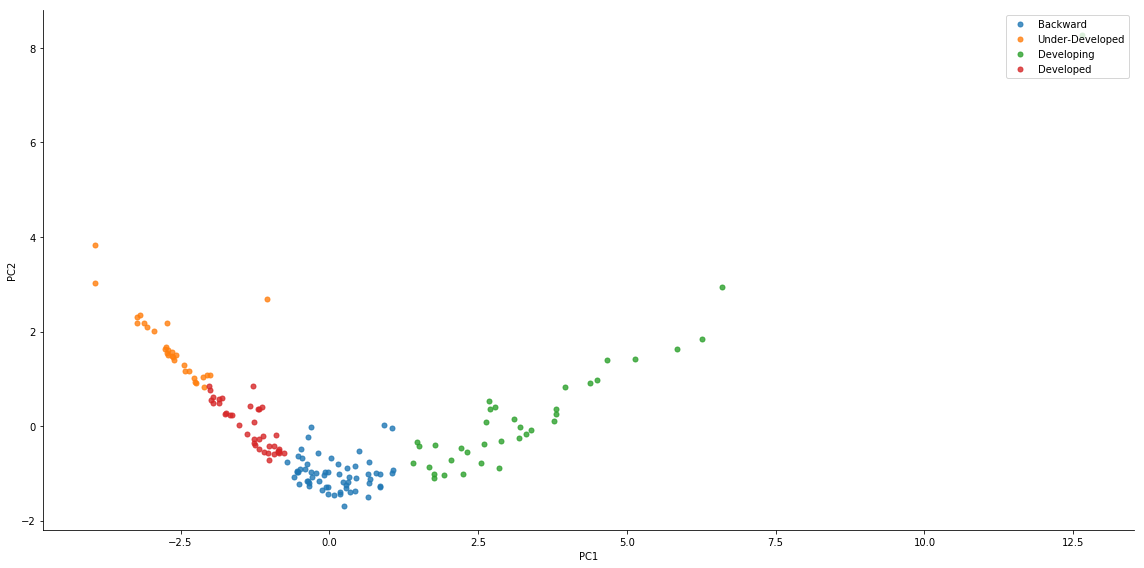

In [151]:
custom_scatter(df=countries_km4,x_var='PC1',y_var='PC2',hue_var='Cluster',summary_df=summary_km4_final)

#### Scatter plot of Principal Components : gdpp vs child_mort based on Clusters

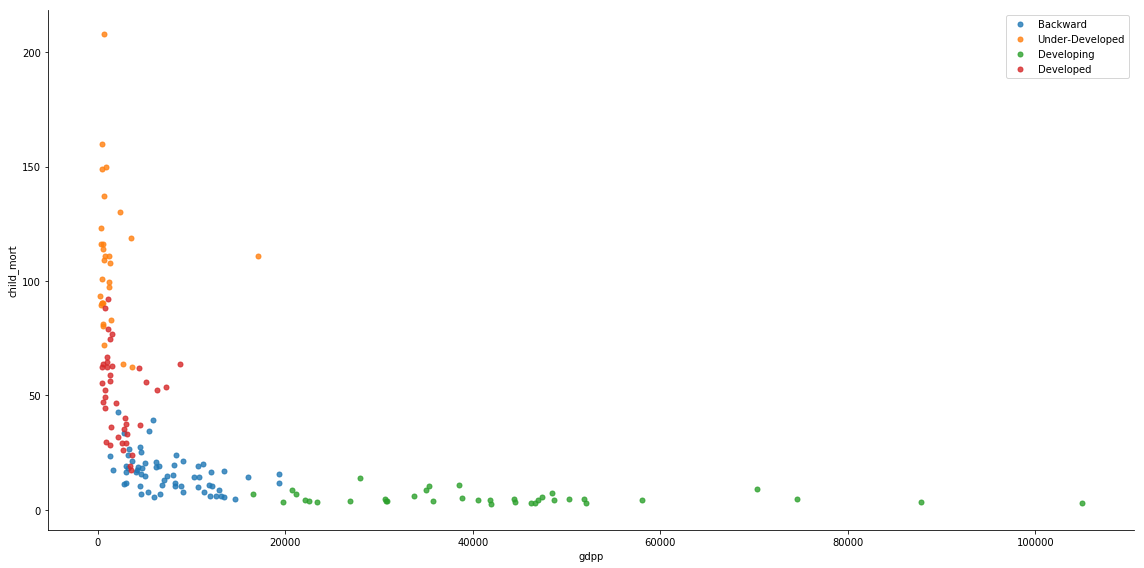

In [152]:
custom_scatter(df=countries_km4,x_var='gdpp',y_var='child_mort',hue_var='Cluster',summary_df=summary_km4_final)

#### Scatter plot of Principal Components : gdpp vs PC1 based on Clusters

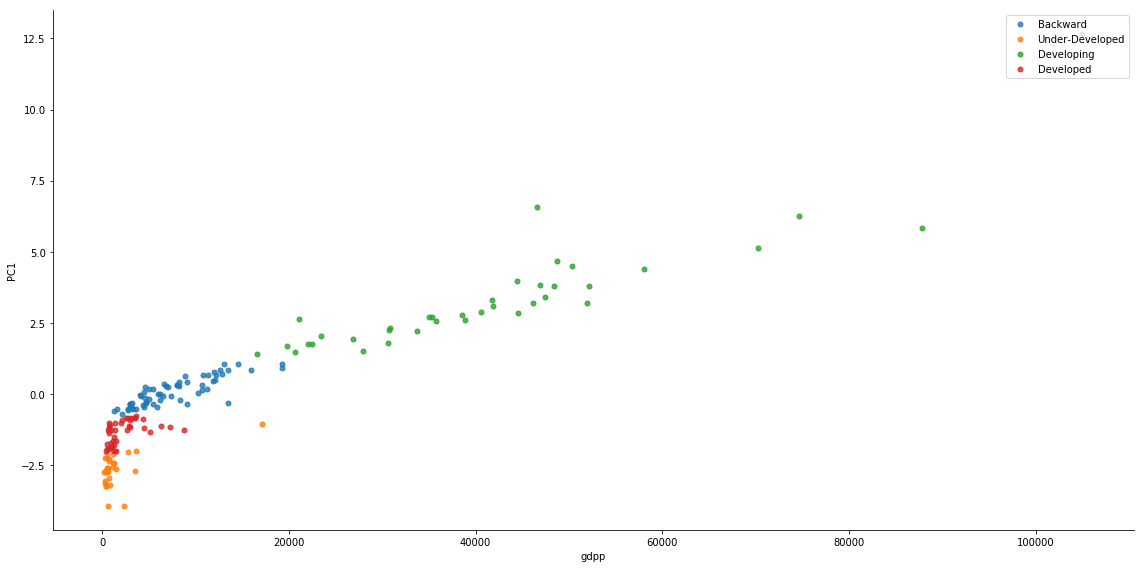

In [153]:
custom_scatter(df=countries_km4,x_var='gdpp',y_var='PC1',hue_var='Cluster',summary_df=summary_km4_final)

## Backward Countries in direst need of aid.

In [154]:
countries_km4[countries_km4.Cluster == summary_km4_final.iloc[0,0]]

,country,PC1,PC2,PC3,child_mort,exportsp,healthp,importsp,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,-2.635581,1.472248,-0.549494,90.2,55,42,248,1610,9.440,56.2,5.82,553,1
3,Angola,-2.722576,2.172339,0.600195,119.0,2199,101,1514,5900,22.400,60.1,6.16,3530,1
17,Benin,-2.363993,1.171670,-1.247190,111.0,180,31,282,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,-2.751453,1.664986,-0.848220,116.0,110,39,170,1430,6.810,57.9,5.87,575,1
26,Burundi,-2.762391,1.628814,-0.299345,93.6,21,27,91,764,12.300,57.7,6.26,231,1
28,Cameroon,-2.438962,1.288262,-1.226100,108.0,291,67,354,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,-3.236904,2.178425,-1.602988,149.0,53,18,118,888,2.010,47.5,5.21,446,1
32,Chad,-3.185340,2.354083,-1.078634,150.0,330,41,390,1930,6.390,56.5,6.59,897,1
37,"Congo, Dem. Rep.",-3.115023,2.170698,0.361487,116.0,137,26,166,609,20.800,57.5,6.54,334,1
38,"Congo, Rep.",-2.047423,1.089143,0.717292,63.9,2332,67,1499,5190,20.700,60.4,4.95,2740,1


In [155]:
len(countries_km4[countries_km4.Cluster == summary_km4_final.iloc[0,0]])

30

In [158]:
print(list(countries_km4[countries_km4.Cluster == summary_km4_final.iloc[0,0]]['country']))

['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Lesotho', 'Liberia', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Sierra Leone', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Zambia']


# END HERE